In [211]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Conv1D, Conv2D, Dense, Dropout, MaxPooling1D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam, Nadam, Adagrad, SGD, RMSprop
# from sklearn.metrics import classification_report
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [212]:
df = pd.read_csv("sensor-nodes.csv")
df.head(10)


,Node_ID,Timestamp,IP_Address,Packet_Rate,Packet_Drop_Rate,Packet_Duplication_Rate,Data_Throughput,Signal_Strength,SNR,Battery_Level,...,Number_of_Neighbors,Route_Request_Frequency,Route_Reply_Frequency,Data_Transmission_Frequency,Data_Reception_Frequency,Error_Rate,CPU_Usage,Memory_Usage,Bandwidth,Is_Malicious
0,1,01-02-2023 00:00,192.168.119.138,52.018229,2.727317,0.955687,130.967180,-52.059232,23.974265,82.982598,...,3,11.323044,11.458199,20.670539,14.385439,0.109146,26.376693,29.186341,76.811986,0
1,2,01-02-2023 00:01,192.168.225.56,59.504648,1.435058,1.228460,82.634358,-57.754723,22.572052,66.734853,...,6,8.277362,8.832980,15.555122,14.316681,0.077136,34.963429,34.203177,112.495912,0
2,3,01-02-2023 00:02,192.168.187.210,34.118204,1.320905,1.015245,61.649928,-52.399037,15.667076,74.593605,...,5,8.196374,8.330227,19.470748,11.792084,0.052993,48.934585,31.682662,117.526109,0
3,4,01-02-2023 00:03,192.168.78.245,39.643055,1.988791,0.784562,69.704181,-53.727443,20.286962,76.710564,...,6,10.683766,6.525032,16.228955,8.895409,0.087810,47.045600,37.470027,123.058913,0
4,5,01-02-2023 00:04,192.168.233.229,40.212679,1.005121,1.412193,123.445612,-49.696620,24.318538,84.477890,...,7,11.176823,10.617432,12.257423,10.168739,0.068823,33.394354,26.582970,71.696911,0
5,6,01-02-2023 00:05,192.168.230.20,42.539308,1.777329,1.226797,140.306629,-48.164891,22.562783,80.792853,...,3,9.100424,10.912167,17.039896,17.098904,0.095630,41.592922,37.011924,135.173141,0
6,7,01-02-2023 00:06,192.168.201.178,34.371305,2.122728,1.238309,82.759149,-46.749541,22.199859,83.896476,...,5,5.514884,9.764031,14.729525,14.537270,0.112991,51.911647,33.413317,113.722314,0
7,8,01-02-2023 00:07,192.168.0.73,39.421713,1.632756,1.070672,128.744279,-47.965449,22.017101,73.018853,...,3,8.785059,7.424502,14.028956,16.584326,0.150733,43.373535,32.514071,101.301618,0
8,9,01-02-2023 00:08,192.168.35.14,64.392638,1.771348,0.614431,105.554913,-45.030005,19.406187,100.505321,...,4,9.652375,9.578266,20.649000,13.220874,0.133769,41.662683,36.024818,130.214575,0
9,10,01-02-2023 00:09,192.168.94.186,71.586404,2.874885,1.175556,109.901877,-43.949902,27.354364,76.642262,...,3,8.413089,14.570255,15.308871,14.962364,0.088105,39.467362,31.086755,130.360976,0


In [213]:
X = df.drop(columns=['Node_ID', 'Timestamp', 'IP_Address', 'Is_Malicious'])
y = df['Is_Malicious']


In [214]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [215]:
# LSTM
X_train_val_lstm, X_test_lstm, y_train_val_lstm, y_test_lstm = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)

X_train_lstm, X_val_lstm, y_train_lstm, y_val_lstm = train_test_split(
    X_train_val_lstm, y_train_val_lstm, test_size=0.25, random_state=42)

print("Shape of X_train:", X_train_lstm.shape)
print("Shape of X_val:", X_val_lstm.shape)
print("Shape of X_test:", X_test_lstm.shape)
print("Shape of y_train:", y_train_lstm.shape)
print("Shape of y_val:", y_val_lstm.shape)
print("Shape of y_test:", y_test_lstm.shape)


Shape of X_train: (6000, 17)
Shape of X_val: (2000, 17)
Shape of X_test: (2000, 17)
Shape of y_train: (6000,)
Shape of y_val: (2000,)
Shape of y_test: (2000,)


In [216]:
sequence_length = X_train_lstm.shape[1]
num_features = 1

# X_train_reshaped_lstm = np.expand_dims(X_train_lstm, axis=-1)
# X_val_reshaped_lstm = np.expand_dims(X_val_lstm, axis=-1)
# X_test_reshaped_lstm = np.expand_dims(X_test_lstm, axis=-1)
X_train_reshaped_lstm = X_train_lstm.reshape(
    X_train_lstm.shape[0], X_train_lstm.shape[1])
X_val_reshaped_lstm = X_val_lstm.reshape(
    X_val_lstm.shape[0], X_val_lstm.shape[1])
X_test_reshaped_lstm = X_test_lstm.reshape(
    X_test_lstm.shape[0], X_test_lstm.shape[1])

print("Sequence length: ", sequence_length)
print("Num of features: ", num_features)


Sequence length:  17
Num of features:  1


In [217]:
lstm_model = Sequential()
lstm_model.add(LSTM(32, input_shape=(sequence_length, num_features),
               kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)))
lstm_model.add(Dense(1, activation='tanh'))
lstm_model.add(Dropout(0.5))


In [218]:
# Adam Optimizer
lstm_adam_optimizer = Adam(learning_rate=0.001)

lstm_model.compile(optimizer=lstm_adam_optimizer,
                   loss='binary_crossentropy', metrics=['accuracy'])

lstm_adam_history = lstm_model.fit(X_train_reshaped_lstm, y_train_lstm,
                                   epochs=100, batch_size=32, validation_data=(X_val_reshaped_lstm, y_val_lstm))


Epoch 1/100
188/188 [==============================] - 3s 8ms/step - loss: 0.4027 - accuracy: 0.9733 - val_loss: 0.0359 - val_accuracy: 0.9955
Epoch 2/100
188/188 [==============================] - 1s 5ms/step - loss: 0.4023 - accuracy: 0.9735 - val_loss: 0.0290 - val_accuracy: 0.9940
Epoch 3/100
188/188 [==============================] - 1s 6ms/step - loss: 0.3644 - accuracy: 0.9762 - val_loss: 0.0297 - val_accuracy: 0.9955
Epoch 4/100
188/188 [==============================] - 1s 5ms/step - loss: 0.3842 - accuracy: 0.9750 - val_loss: 0.0165 - val_accuracy: 0.9970
Epoch 5/100
188/188 [==============================] - 1s 5ms/step - loss: 0.3910 - accuracy: 0.9747 - val_loss: 0.0121 - val_accuracy: 0.9980
Epoch 6/100
188/188 [==============================] - 1s 5ms/step - loss: 0.3625 - accuracy: 0.9765 - val_loss: 0.0110 - val_accuracy: 0.9980
Epoch 7/100
188/188 [==============================] - 1s 5ms/step - loss: 0.4139 - accuracy: 0.9728 - val_loss: 0.0077 - val_accuracy: 0.9985

In [219]:
lstm_nadam_optimizer = Nadam(learning_rate=0.001)
lstm_model.compile(optimizer=lstm_nadam_optimizer,
                   loss='binary_crossentropy', metrics=['accuracy'])
lstm_nadam_history = lstm_model.fit(X_train_reshaped_lstm, y_train_lstm,
                                    epochs=100, batch_size=32, validation_data=(X_val_reshaped_lstm, y_val_lstm))


Epoch 1/100
188/188 [==============================] - 3s 6ms/step - loss: 0.4432 - accuracy: 0.9710 - val_loss: 0.0023 - val_accuracy: 0.9995
Epoch 2/100
188/188 [==============================] - 1s 4ms/step - loss: 0.3351 - accuracy: 0.9782 - val_loss: 0.0038 - val_accuracy: 0.9980
Epoch 3/100
188/188 [==============================] - 1s 4ms/step - loss: 0.3989 - accuracy: 0.9742 - val_loss: 0.0025 - val_accuracy: 0.9995
Epoch 4/100
188/188 [==============================] - 1s 5ms/step - loss: 0.3914 - accuracy: 0.9745 - val_loss: 0.0044 - val_accuracy: 0.9990
Epoch 5/100
188/188 [==============================] - 1s 5ms/step - loss: 0.4247 - accuracy: 0.9725 - val_loss: 0.0029 - val_accuracy: 0.9995
Epoch 6/100
188/188 [==============================] - 1s 5ms/step - loss: 0.3784 - accuracy: 0.9755 - val_loss: 0.0144 - val_accuracy: 0.9975
Epoch 7/100
188/188 [==============================] - 1s 5ms/step - loss: 0.4087 - accuracy: 0.9727 - val_loss: 0.0275 - val_accuracy: 0.9975

In [220]:
lstm_adagrad_optimizer = Adagrad(learning_rate=0.001)
lstm_model.compile(optimizer=lstm_adagrad_optimizer,
                   loss='binary_crossentropy', metrics=['accuracy'])
lstm_adagrad_history = lstm_model.fit(X_train_reshaped_lstm, y_train_lstm,
                                      epochs=100, batch_size=32, validation_data=(X_val_reshaped_lstm, y_val_lstm))


Epoch 1/100
188/188 [==============================] - 2s 6ms/step - loss: 0.4004 - accuracy: 0.9738 - val_loss: 0.0075 - val_accuracy: 0.9980
Epoch 2/100
188/188 [==============================] - 1s 4ms/step - loss: 0.3283 - accuracy: 0.9785 - val_loss: 0.0070 - val_accuracy: 0.9990
Epoch 3/100
188/188 [==============================] - 1s 4ms/step - loss: 0.3465 - accuracy: 0.9772 - val_loss: 0.0068 - val_accuracy: 0.9990
Epoch 4/100
188/188 [==============================] - 1s 5ms/step - loss: 0.4207 - accuracy: 0.9725 - val_loss: 0.0067 - val_accuracy: 0.9990
Epoch 5/100
188/188 [==============================] - 1s 5ms/step - loss: 0.3793 - accuracy: 0.9752 - val_loss: 0.0066 - val_accuracy: 0.9990
Epoch 6/100
188/188 [==============================] - 1s 5ms/step - loss: 0.3712 - accuracy: 0.9760 - val_loss: 0.0066 - val_accuracy: 0.9990
Epoch 7/100
188/188 [==============================] - 1s 5ms/step - loss: 0.4074 - accuracy: 0.9735 - val_loss: 0.0066 - val_accuracy: 0.9990

In [221]:
lstm_sgd_optimizer = SGD(learning_rate=0.001)

lstm_model.compile(optimizer=lstm_sgd_optimizer,
                   loss='binary_crossentropy', metrics=['accuracy'])

lstm_sgd_history = lstm_model.fit(X_train_reshaped_lstm, y_train_lstm, epochs=100,
                                  batch_size=32, validation_data=(X_val_reshaped_lstm, y_val_lstm))


Epoch 1/100
188/188 [==============================] - 2s 6ms/step - loss: 0.4148 - accuracy: 0.9730 - val_loss: 0.0057 - val_accuracy: 0.9990
Epoch 2/100
188/188 [==============================] - 1s 4ms/step - loss: 0.3890 - accuracy: 0.9747 - val_loss: 0.0058 - val_accuracy: 0.9990
Epoch 3/100
188/188 [==============================] - 1s 4ms/step - loss: 0.3607 - accuracy: 0.9765 - val_loss: 0.0057 - val_accuracy: 0.9990
Epoch 4/100
188/188 [==============================] - 1s 5ms/step - loss: 0.3865 - accuracy: 0.9748 - val_loss: 0.0058 - val_accuracy: 0.9990
Epoch 5/100
188/188 [==============================] - 1s 5ms/step - loss: 0.3813 - accuracy: 0.9752 - val_loss: 0.0059 - val_accuracy: 0.9990
Epoch 6/100
188/188 [==============================] - 1s 5ms/step - loss: 0.3528 - accuracy: 0.9772 - val_loss: 0.0059 - val_accuracy: 0.9990
Epoch 7/100
188/188 [==============================] - 1s 5ms/step - loss: 0.3862 - accuracy: 0.9750 - val_loss: 0.0062 - val_accuracy: 0.9985

In [222]:
lstm_rms_optimizer = RMSprop(learning_rate=0.001)

lstm_model.compile(optimizer=lstm_rms_optimizer,
                   loss='binary_crossentropy', metrics=['accuracy'])

lstm_rms_history = lstm_model.fit(X_train_reshaped_lstm, y_train_lstm, epochs=100,
                                  batch_size=32, validation_data=(X_val_reshaped_lstm, y_val_lstm))


Epoch 1/100
188/188 [==============================] - 2s 6ms/step - loss: 0.3994 - accuracy: 0.9738 - val_loss: 0.0272 - val_accuracy: 0.9910
Epoch 2/100
188/188 [==============================] - 1s 4ms/step - loss: 0.3661 - accuracy: 0.9760 - val_loss: 0.0092 - val_accuracy: 0.9980
Epoch 3/100
188/188 [==============================] - 1s 4ms/step - loss: 0.4250 - accuracy: 0.9723 - val_loss: 0.0073 - val_accuracy: 0.9980
Epoch 4/100
188/188 [==============================] - 1s 5ms/step - loss: 0.4198 - accuracy: 0.9727 - val_loss: 0.0074 - val_accuracy: 0.9980
Epoch 5/100
188/188 [==============================] - 1s 5ms/step - loss: 0.3711 - accuracy: 0.9758 - val_loss: 0.0081 - val_accuracy: 0.9980
Epoch 6/100
188/188 [==============================] - 1s 5ms/step - loss: 0.3813 - accuracy: 0.9752 - val_loss: 0.0123 - val_accuracy: 0.9970
Epoch 7/100
188/188 [==============================] - 1s 5ms/step - loss: 0.3426 - accuracy: 0.9778 - val_loss: 0.0068 - val_accuracy: 0.9975

In [223]:
lstm_loss, lstm_accuracy = lstm_model.evaluate(
    X_test_reshaped_lstm, y_test_lstm)
print("Test LSTM Loss: ", lstm_loss)
print("Test LSTM Accuracy: ", lstm_accuracy)


63/63 [==============================] - 0s 2ms/step - loss: 0.0075 - accuracy: 0.9975
Test LSTM Loss:  0.007540866266936064
Test LSTM Accuracy:  0.9975000023841858


In [224]:
lstm_train_probs = lstm_model.predict(X_train_reshaped_lstm, verbose=0)
lstm_train_classes = (lstm_model.predict(
    X_train_reshaped_lstm, verbose=0) > 0.5).astype("int32")

lstm_train_probs = lstm_train_probs[:, 0]
lstm_train_classes = lstm_train_classes[:, 0]

lstm_train_accuracy = accuracy_score(y_train_lstm, lstm_train_classes)
print("Accuracy: ", lstm_train_accuracy)

lstm_train_precision = precision_score(y_train_lstm, lstm_train_classes)
print("Precision: ", lstm_train_precision)

lstm_train_recall = recall_score(y_train_lstm, lstm_train_classes)
print("Recall: ", lstm_train_recall)

train_f1_score_value_lstm = f1_score(y_train_lstm, lstm_train_classes)
print("F1 score: ", train_f1_score_value_lstm)


Accuracy:  0.9973333333333333
Precision:  1.0
Recall:  0.9457627118644067
F1 score:  0.9721254355400697


In [225]:
lstm_probs = lstm_model.predict(X_test_reshaped_lstm, verbose=0)
lstm_classes = (lstm_model.predict(
    X_test_reshaped_lstm, verbose=0) > 0.5).astype("int32")

lstm_probs = lstm_probs[:, 0]
lstm_classes = lstm_classes[:, 0]

lstm_accuracy = accuracy_score(y_test_lstm, lstm_classes)
print("Accuracy: ", lstm_accuracy)

lstm_precision = precision_score(y_test_lstm, lstm_classes)
print("Precision: ", lstm_precision)

lstm_recall = recall_score(y_test_lstm, lstm_classes)
print("Recall: ", lstm_recall)

f1_score_value_lstm = f1_score(y_test_lstm, lstm_classes)
print("F1 score: ", f1_score_value_lstm)


Accuracy:  0.9975
Precision:  1.0
Recall:  0.9504950495049505
F1 score:  0.9746192893401014


In [226]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']


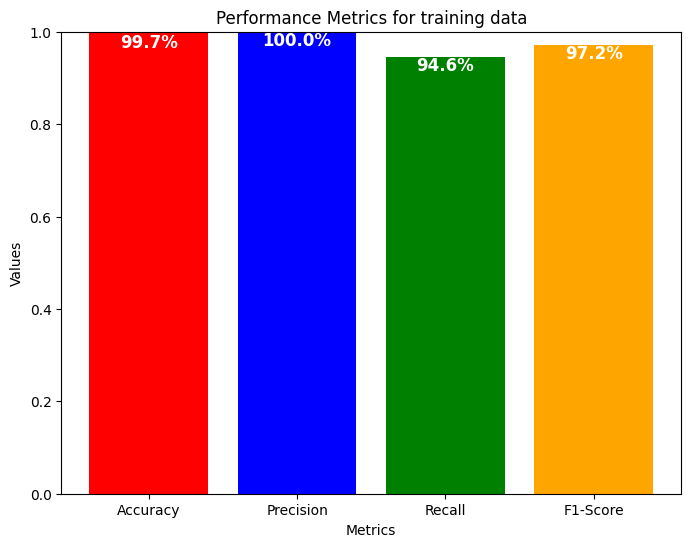

In [227]:
lstm_train_values = [lstm_train_accuracy, lstm_train_precision,
                     lstm_train_recall, train_f1_score_value_lstm]

plt.figure(figsize=(8, 6))
lstm_train_matrix_bars = plt.bar(metrics, lstm_train_values, color=['red',
                                                                    'blue', 'green', 'orange'])
for bar in lstm_train_matrix_bars:
    y_val = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, y_val,
             f'{y_val*100:.1f}%', ha='center', va='top', color='white', fontsize=12, fontweight='bold')

plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Performance Metrics for training data')
plt.ylim([0, 1])
plt.show()


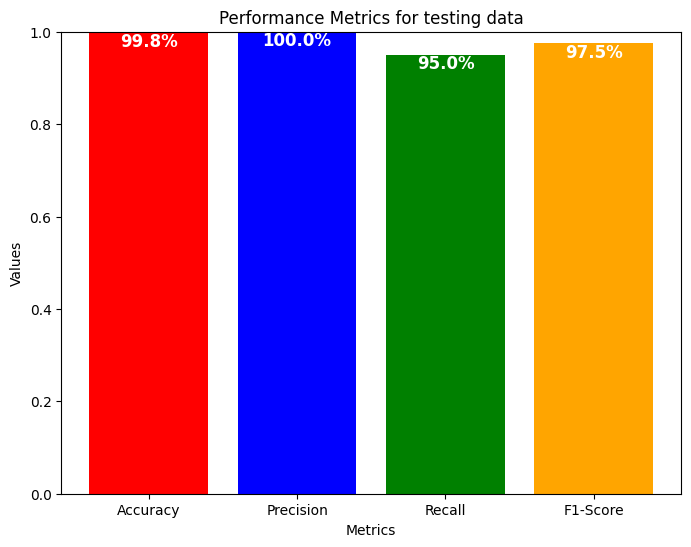

In [228]:
lstm_values = [lstm_accuracy, lstm_precision, lstm_recall, f1_score_value_lstm]

plt.figure(figsize=(8, 6))
lstm_matrix_bars = plt.bar(metrics, lstm_values, color=['red',
                           'blue', 'green', 'orange'])
for bar in lstm_matrix_bars:
    y_val = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, y_val,
             f'{y_val*100:.1f}%', ha='center', va='top', color='white', fontsize=12, fontweight='bold')

plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Performance Metrics for testing data')
plt.ylim([0, 1])
plt.show()


In [229]:
# GRU
X_train_gru, X_temp_gru, y_train_gru, y_temp_gru = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42)

X_val_gru, X_test_gru, y_val_gru, y_test_gru = train_test_split(
    X_temp_gru, y_temp_gru, test_size=0.5, random_state=42)

X_train_reshaped_gru = X_train_gru.reshape(-1, 1, X_train_gru.shape[1])
X_val_reshaped_gru = X_val_gru.reshape(-1, 1, X_val_gru.shape[1])
X_test_reshaped_gru = X_test_gru.reshape(-1, 1, X_test_gru.shape[1])


In [230]:
gru_model = Sequential()
gru_model.add(GRU(32, input_shape=(
    X_train_reshaped_gru.shape[1], X_train_reshaped_gru.shape[2]), kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)))
gru_model.add(Dense(1, activation='tanh'))
gru_model.add(Dropout(0.5))


In [231]:
gru_adam_optimizer = Adam(learning_rate=0.001)
gru_model.compile(optimizer=gru_adam_optimizer,
                  loss='binary_crossentropy', metrics=['accuracy'])

gru_adam_history = gru_model.fit(X_train_reshaped_gru, y_train_gru, epochs=100,
                                 batch_size=32, validation_data=(X_val_reshaped_gru, y_val_gru))


Epoch 1/100
219/219 [==============================] - 2s 3ms/step - loss: 0.5533 - accuracy: 0.9680 - val_loss: 0.1116 - val_accuracy: 0.9967
Epoch 2/100
219/219 [==============================] - 0s 2ms/step - loss: 0.4676 - accuracy: 0.9746 - val_loss: 0.0735 - val_accuracy: 0.9967
Epoch 3/100
219/219 [==============================] - 1s 5ms/step - loss: 0.4348 - accuracy: 0.9747 - val_loss: 0.0511 - val_accuracy: 0.9973
Epoch 4/100
219/219 [==============================] - 0s 2ms/step - loss: 0.4028 - accuracy: 0.9756 - val_loss: 0.0351 - val_accuracy: 1.0000
Epoch 5/100
219/219 [==============================] - 0s 2ms/step - loss: 0.4073 - accuracy: 0.9746 - val_loss: 0.0304 - val_accuracy: 0.9980
Epoch 6/100
219/219 [==============================] - 0s 2ms/step - loss: 0.3833 - accuracy: 0.9757 - val_loss: 0.0237 - val_accuracy: 0.9987
Epoch 7/100
219/219 [==============================] - 0s 2ms/step - loss: 0.3890 - accuracy: 0.9751 - val_loss: 0.0271 - val_accuracy: 0.9913

In [232]:
gru_nadam_optimizer = Nadam(learning_rate=0.001)
gru_model.compile(optimizer=gru_nadam_optimizer,
                  loss='binary_crossentropy', metrics=['accuracy'])

gru_nadam_history = gru_model.fit(X_train_reshaped_gru, y_train_gru, epochs=100,
                                  batch_size=32, validation_data=(X_val_reshaped_gru, y_val_gru))


Epoch 1/100
219/219 [==============================] - 3s 4ms/step - loss: 0.4215 - accuracy: 0.9727 - val_loss: 0.0121 - val_accuracy: 1.0000
Epoch 2/100
219/219 [==============================] - 0s 2ms/step - loss: 0.3709 - accuracy: 0.9760 - val_loss: 0.0090 - val_accuracy: 1.0000
Epoch 3/100
219/219 [==============================] - 0s 2ms/step - loss: 0.3775 - accuracy: 0.9756 - val_loss: 0.0051 - val_accuracy: 1.0000
Epoch 4/100
219/219 [==============================] - 0s 2ms/step - loss: 0.3643 - accuracy: 0.9764 - val_loss: 0.0114 - val_accuracy: 1.0000
Epoch 5/100
219/219 [==============================] - 0s 2ms/step - loss: 0.3642 - accuracy: 0.9764 - val_loss: 0.0061 - val_accuracy: 1.0000
Epoch 6/100
219/219 [==============================] - 0s 2ms/step - loss: 0.4061 - accuracy: 0.9737 - val_loss: 0.0084 - val_accuracy: 1.0000
Epoch 7/100
219/219 [==============================] - 0s 2ms/step - loss: 0.4369 - accuracy: 0.9717 - val_loss: 0.0102 - val_accuracy: 1.0000

In [233]:
gru_adagrad_optimizer = Adagrad(learning_rate=0.001)
gru_model.compile(optimizer=gru_adagrad_optimizer,
                  loss='binary_crossentropy', metrics=['accuracy'])

gru_adagrad_history = gru_model.fit(X_train_reshaped_gru, y_train_gru,
                                    epochs=100, batch_size=32, validation_data=(X_val_reshaped_gru, y_val_gru))


Epoch 1/100
219/219 [==============================] - 2s 3ms/step - loss: 0.3288 - accuracy: 0.9787 - val_loss: 0.0032 - val_accuracy: 1.0000
Epoch 2/100
219/219 [==============================] - 0s 2ms/step - loss: 0.3596 - accuracy: 0.9767 - val_loss: 0.0035 - val_accuracy: 1.0000
Epoch 3/100
219/219 [==============================] - 0s 2ms/step - loss: 0.3397 - accuracy: 0.9780 - val_loss: 0.0037 - val_accuracy: 1.0000
Epoch 4/100
219/219 [==============================] - 0s 2ms/step - loss: 0.3948 - accuracy: 0.9744 - val_loss: 0.0039 - val_accuracy: 1.0000
Epoch 5/100
219/219 [==============================] - 0s 2ms/step - loss: 0.3728 - accuracy: 0.9759 - val_loss: 0.0042 - val_accuracy: 1.0000
Epoch 6/100
219/219 [==============================] - 0s 2ms/step - loss: 0.3882 - accuracy: 0.9749 - val_loss: 0.0044 - val_accuracy: 1.0000
Epoch 7/100
219/219 [==============================] - 0s 2ms/step - loss: 0.3794 - accuracy: 0.9754 - val_loss: 0.0047 - val_accuracy: 1.0000

In [234]:
gru_sgd_optimizer = SGD(learning_rate=0.001)

gru_model.compile(optimizer=gru_sgd_optimizer,
                  loss='binary_crossentropy', metrics=['accuracy'])

gru_sgd_history = gru_model.fit(X_train_reshaped_gru, y_train_gru, epochs=100,
                                batch_size=32, validation_data=(X_val_reshaped_gru, y_val_gru))


Epoch 1/100
219/219 [==============================] - 2s 3ms/step - loss: 0.4145 - accuracy: 0.9731 - val_loss: 0.0071 - val_accuracy: 1.0000
Epoch 2/100
219/219 [==============================] - 0s 2ms/step - loss: 0.4013 - accuracy: 0.9740 - val_loss: 0.0071 - val_accuracy: 1.0000
Epoch 3/100
219/219 [==============================] - 0s 2ms/step - loss: 0.3947 - accuracy: 0.9744 - val_loss: 0.0070 - val_accuracy: 1.0000
Epoch 4/100
219/219 [==============================] - 0s 2ms/step - loss: 0.3925 - accuracy: 0.9746 - val_loss: 0.0073 - val_accuracy: 1.0000
Epoch 5/100
219/219 [==============================] - 0s 2ms/step - loss: 0.3991 - accuracy: 0.9741 - val_loss: 0.0073 - val_accuracy: 1.0000
Epoch 6/100
219/219 [==============================] - 0s 2ms/step - loss: 0.3484 - accuracy: 0.9774 - val_loss: 0.0071 - val_accuracy: 1.0000
Epoch 7/100
219/219 [==============================] - 0s 2ms/step - loss: 0.3639 - accuracy: 0.9764 - val_loss: 0.0071 - val_accuracy: 1.0000

In [235]:
gru_rms_optimizer = RMSprop(learning_rate=0.001)

gru_model.compile(optimizer=gru_rms_optimizer,
                  loss='binary_crossentropy', metrics=['accuracy'])

gru_rms_history = gru_model.fit(X_train_reshaped_gru, y_train_gru, epochs=100,
                                batch_size=32, validation_data=(X_val_reshaped_gru, y_val_gru))


Epoch 1/100
219/219 [==============================] - 2s 3ms/step - loss: 0.4027 - accuracy: 0.9736 - val_loss: 0.0133 - val_accuracy: 0.9987
Epoch 2/100
219/219 [==============================] - 0s 2ms/step - loss: 0.3779 - accuracy: 0.9756 - val_loss: 0.0126 - val_accuracy: 1.0000
Epoch 3/100
219/219 [==============================] - 0s 2ms/step - loss: 0.3581 - accuracy: 0.9769 - val_loss: 0.0146 - val_accuracy: 0.9993
Epoch 4/100
219/219 [==============================] - 0s 2ms/step - loss: 0.3692 - accuracy: 0.9761 - val_loss: 0.0134 - val_accuracy: 1.0000
Epoch 5/100
219/219 [==============================] - 0s 2ms/step - loss: 0.4001 - accuracy: 0.9741 - val_loss: 0.0125 - val_accuracy: 1.0000
Epoch 6/100
219/219 [==============================] - 0s 2ms/step - loss: 0.3868 - accuracy: 0.9750 - val_loss: 0.0132 - val_accuracy: 1.0000
Epoch 7/100
219/219 [==============================] - 0s 2ms/step - loss: 0.3978 - accuracy: 0.9743 - val_loss: 0.0178 - val_accuracy: 0.9967

In [236]:
gru_loss, gru_accuracy = gru_model.evaluate(X_test_reshaped_gru, y_test_gru)
print("Test GRU Loss: ", gru_loss)
print("Test GRU Accuracy: ", gru_accuracy)


47/47 [==============================] - 0s 1ms/step - loss: 0.0082 - accuracy: 1.0000
Test GRU Loss:  0.00823227223008871
Test GRU Accuracy:  1.0


In [237]:
gru_train_probs = gru_model.predict(X_train_reshaped_gru, verbose=0)
gru_train_classes = (gru_model.predict(
    X_train_reshaped_gru, verbose=0) > 0.5).astype("int32")

# gru_train_probs = gru_train_probs[:, 0]
# gru_train_classes = gru_train_classes[:, 0]

gru_train_accuracy = accuracy_score(y_train_gru, gru_train_classes)
print("Accuracy: ", gru_train_accuracy)

gru_train_precision = precision_score(y_train_gru, gru_train_classes)
print("Precision: ", gru_train_precision)

gru_train_recall = recall_score(y_train_gru, gru_train_classes)
print("Recall: ", gru_train_recall)

train_f1_score_value_gru = f1_score(y_train_gru, gru_train_classes)
print("F1 score: ", train_f1_score_value_gru)


Accuracy:  1.0
Precision:  1.0
Recall:  1.0
F1 score:  1.0


In [238]:
gru_probs = gru_model.predict(X_test_reshaped_gru, verbose=0)
gru_classes = (gru_model.predict(
    X_test_reshaped_gru, verbose=0) > 0.5).astype("int32")

gru_probs = gru_probs[:, 0]
gru_classes = gru_classes[:, 0]

gru_accuracy = accuracy_score(y_test_gru, gru_classes)
print("Accuracy: ", gru_accuracy)

gru_precision = precision_score(y_test_gru, gru_classes)
print("Precision: ", gru_precision)

gru_recall = recall_score(y_test_gru, gru_classes)
print("Recall: ", gru_recall)

f1_score_value_gru = f1_score(y_test_gru, gru_classes)
print("F1 score: ", f1_score_value_gru)


Accuracy:  1.0
Precision:  1.0
Recall:  1.0
F1 score:  1.0


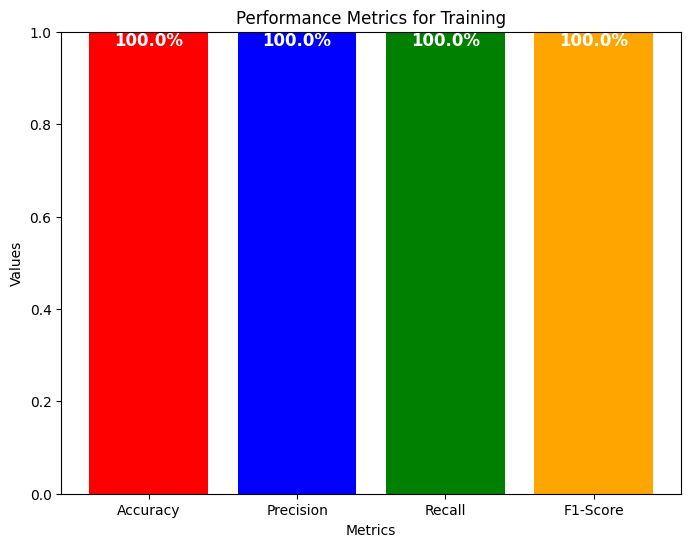

In [239]:
gru_values = [gru_train_accuracy, gru_train_precision,
              gru_train_recall, train_f1_score_value_gru]

plt.figure(figsize=(8, 6))
gru_matrix_bars = plt.bar(metrics, gru_values, color=['red',
                          'blue', 'green', 'orange'])
for bar in gru_matrix_bars:
    y_val = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, y_val,
             f'{y_val*100:.1f}%', ha='center', va='top', color='white', fontsize=12, fontweight='bold')

plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Performance Metrics for Training')
plt.ylim(0, 1)
plt.show()


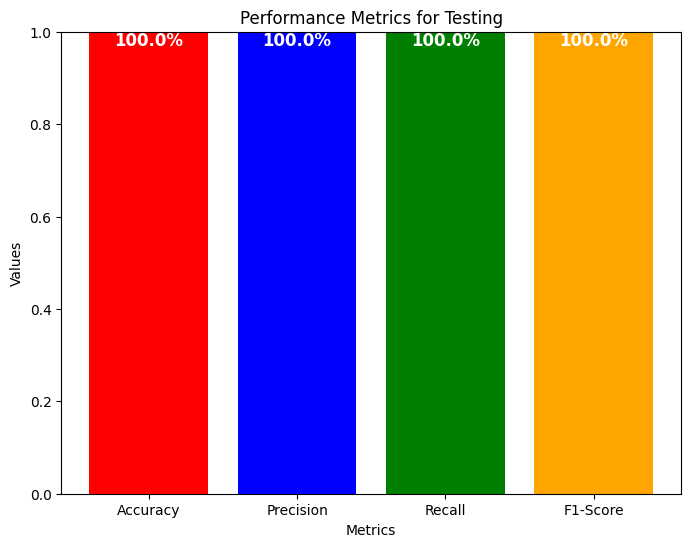

In [240]:
gru_values = [gru_accuracy, gru_precision, gru_recall, f1_score_value_gru]

plt.figure(figsize=(8, 6))
gru_matrix_bars = plt.bar(metrics, gru_values, color=['red',
                          'blue', 'green', 'orange'])
for bar in gru_matrix_bars:
    y_val = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, y_val,
             f'{y_val*100:.1f}%', ha='center', va='top', color='white', fontsize=12, fontweight='bold')

plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Performance Metrics for Testing')
plt.ylim(0, 1)
plt.show()


In [241]:
# CNN
X_train_cnn, X_temp_cnn, y_train_cnn, y_temp_cnn = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42)

X_val_cnn, X_test_cnn, y_val_cnn, y_test_cnn = train_test_split(
    X_temp_cnn, y_temp_cnn, test_size=0.5, random_state=42)

print("Shape of X_train:", X_train_cnn.shape)

sequence_length = X_train_cnn.shape[1]
num_features = 1

X_train_reshaped_cnn = X_train_cnn.reshape(-1, sequence_length, num_features)
X_val_reshaped_cnn = X_val_cnn.reshape(-1, sequence_length, num_features)
X_test_reshaped_cnn = X_test_cnn.reshape(-1, sequence_length, num_features)


Shape of X_train: (7000, 17)


In [242]:
cnn_model = Sequential()

cnn_model.add(Conv1D(filters=16, kernel_size=3, input_shape=(
    sequence_length, num_features), kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)))

cnn_model.add(MaxPooling1D(pool_size=2))

cnn_model.add(Conv1D(filters=16, kernel_size=3))

cnn_model.add(MaxPooling1D(pool_size=2))

cnn_model.add(Flatten())

cnn_model.add(Dense(16, activation="relu"))

cnn_model.add(Dropout(0.5))


In [243]:
cnn_adam_optimizer = Adam(learning_rate=0.001)
cnn_model.compile(optimizer=cnn_adam_optimizer,
                  loss='binary_crossentropy', metrics=['accuracy'])
cnn_adam_history = cnn_model.fit(X_train_reshaped_cnn, y_train_cnn, epochs=100,
                                 batch_size=32, validation_data=(X_val_reshaped_cnn, y_val_cnn))


Epoch 1/100
219/219 [==============================] - 1s 2ms/step - loss: 0.6847 - accuracy: 0.2314 - val_loss: 0.2312 - val_accuracy: 0.2593
Epoch 2/100
219/219 [==============================] - 0s 2ms/step - loss: 0.5477 - accuracy: 0.4214 - val_loss: 0.2171 - val_accuracy: 0.3867
Epoch 3/100
219/219 [==============================] - 0s 1ms/step - loss: 0.5152 - accuracy: 0.6354 - val_loss: 0.2087 - val_accuracy: 0.5313
Epoch 4/100
219/219 [==============================] - 0s 2ms/step - loss: 0.5070 - accuracy: 0.7184 - val_loss: 0.1870 - val_accuracy: 0.6673
Epoch 5/100
219/219 [==============================] - 0s 2ms/step - loss: 0.4801 - accuracy: 0.7743 - val_loss: 0.1600 - val_accuracy: 0.7313
Epoch 6/100
219/219 [==============================] - 0s 1ms/step - loss: 0.4837 - accuracy: 0.8073 - val_loss: 0.1584 - val_accuracy: 0.6313
Epoch 7/100
219/219 [==============================] - 0s 1ms/step - loss: 0.4742 - accuracy: 0.8027 - val_loss: 0.1529 - val_accuracy: 0.7927

In [244]:
cnn_nadam_optimizer = Nadam(learning_rate=0.001)
cnn_model.compile(optimizer=cnn_nadam_optimizer,
                  loss='binary_crossentropy', metrics=['accuracy'])
cnn_nadam_history = cnn_model.fit(X_train_reshaped_cnn, y_train_cnn, epochs=100,
                                  batch_size=32, validation_data=(X_val_reshaped_cnn, y_val_cnn))


Epoch 1/100
219/219 [==============================] - 1s 2ms/step - loss: 0.3867 - accuracy: 0.9549 - val_loss: 0.0044 - val_accuracy: 0.9567
Epoch 2/100
219/219 [==============================] - 0s 2ms/step - loss: 0.3832 - accuracy: 0.9531 - val_loss: 0.0036 - val_accuracy: 0.9567
Epoch 3/100
219/219 [==============================] - 0s 2ms/step - loss: 0.3920 - accuracy: 0.9544 - val_loss: 0.0032 - val_accuracy: 0.9573
Epoch 4/100
219/219 [==============================] - 0s 2ms/step - loss: 0.3854 - accuracy: 0.9517 - val_loss: 0.0022 - val_accuracy: 0.9560
Epoch 5/100
219/219 [==============================] - 0s 2ms/step - loss: 0.3828 - accuracy: 0.9536 - val_loss: 0.0051 - val_accuracy: 0.9607
Epoch 6/100
219/219 [==============================] - 0s 2ms/step - loss: 0.3856 - accuracy: 0.9521 - val_loss: 0.0030 - val_accuracy: 0.9560
Epoch 7/100
219/219 [==============================] - 0s 1ms/step - loss: 0.3862 - accuracy: 0.9516 - val_loss: 0.0051 - val_accuracy: 0.9547

In [245]:
cnn_adagrad_optimizer = Adagrad(learning_rate=0.001)
cnn_model.compile(optimizer=cnn_adagrad_optimizer,
                  loss='binary_crossentropy', metrics=['accuracy'])
cnn_adagrad_history = cnn_model.fit(X_train_reshaped_cnn, y_train_cnn, epochs=100,
                                    batch_size=32, validation_data=(X_val_reshaped_cnn, y_val_cnn))


Epoch 1/100
219/219 [==============================] - 1s 2ms/step - loss: 0.3906 - accuracy: 0.9537 - val_loss: 0.0015 - val_accuracy: 0.9607
Epoch 2/100
219/219 [==============================] - 0s 1ms/step - loss: 0.3843 - accuracy: 0.9539 - val_loss: 0.0017 - val_accuracy: 0.9600
Epoch 3/100
219/219 [==============================] - 0s 1ms/step - loss: 0.3869 - accuracy: 0.9543 - val_loss: 0.0021 - val_accuracy: 0.9600
Epoch 4/100
219/219 [==============================] - 0s 1ms/step - loss: 0.3961 - accuracy: 0.9536 - val_loss: 0.0030 - val_accuracy: 0.9600
Epoch 5/100
219/219 [==============================] - 0s 1ms/step - loss: 0.3910 - accuracy: 0.9526 - val_loss: 0.0038 - val_accuracy: 0.9607
Epoch 6/100
219/219 [==============================] - 0s 1ms/step - loss: 0.3843 - accuracy: 0.9523 - val_loss: 0.0044 - val_accuracy: 0.9607
Epoch 7/100
219/219 [==============================] - 0s 1ms/step - loss: 0.3823 - accuracy: 0.9526 - val_loss: 0.0033 - val_accuracy: 0.9600

In [246]:
cnn_sgd_optimizer = SGD(learning_rate=0.001)

cnn_model.compile(optimizer=cnn_sgd_optimizer,
                  loss='binary_crossentropy', metrics=['accuracy'])

cnn_sgd_history = cnn_model.fit(X_train_reshaped_cnn, y_train_cnn, epochs=100,
                                batch_size=32, validation_data=(X_val_reshaped_cnn, y_val_cnn))


Epoch 1/100
219/219 [==============================] - 1s 2ms/step - loss: 0.3801 - accuracy: 0.9509 - val_loss: 0.0026 - val_accuracy: 0.9567
Epoch 2/100
219/219 [==============================] - 0s 1ms/step - loss: 0.3804 - accuracy: 0.9516 - val_loss: 0.0026 - val_accuracy: 0.9567
Epoch 3/100
219/219 [==============================] - 0s 1ms/step - loss: 0.3946 - accuracy: 0.9511 - val_loss: 0.0025 - val_accuracy: 0.9567
Epoch 4/100
219/219 [==============================] - 0s 1ms/step - loss: 0.3816 - accuracy: 0.9514 - val_loss: 0.0026 - val_accuracy: 0.9567
Epoch 5/100
219/219 [==============================] - 0s 1ms/step - loss: 0.3816 - accuracy: 0.9507 - val_loss: 0.0025 - val_accuracy: 0.9567
Epoch 6/100
219/219 [==============================] - 0s 1ms/step - loss: 0.3896 - accuracy: 0.9504 - val_loss: 0.0026 - val_accuracy: 0.9567
Epoch 7/100
219/219 [==============================] - 0s 2ms/step - loss: 0.3801 - accuracy: 0.9516 - val_loss: 0.0025 - val_accuracy: 0.9567

In [247]:
cnn_rms_optimizer = RMSprop(learning_rate=0.001)

cnn_model.compile(optimizer=cnn_rms_optimizer,
                  loss='binary_crossentropy', metrics=['accuracy'])

cnn_rms_history = cnn_model.fit(X_train_reshaped_cnn, y_train_cnn, epochs=100,
                                batch_size=32, validation_data=(X_val_reshaped_cnn, y_val_cnn))


Epoch 1/100
219/219 [==============================] - 1s 3ms/step - loss: 0.3932 - accuracy: 0.9513 - val_loss: 0.0048 - val_accuracy: 0.9547
Epoch 2/100
219/219 [==============================] - 1s 3ms/step - loss: 0.3817 - accuracy: 0.9526 - val_loss: 0.0057 - val_accuracy: 0.9613
Epoch 3/100
219/219 [==============================] - 1s 3ms/step - loss: 0.3959 - accuracy: 0.9534 - val_loss: 0.0023 - val_accuracy: 0.9607
Epoch 4/100
219/219 [==============================] - 1s 3ms/step - loss: 0.3880 - accuracy: 0.9570 - val_loss: 0.0050 - val_accuracy: 0.9620
Epoch 5/100
219/219 [==============================] - 1s 2ms/step - loss: 0.3872 - accuracy: 0.9571 - val_loss: 0.0094 - val_accuracy: 0.9667
Epoch 6/100
219/219 [==============================] - 0s 2ms/step - loss: 0.3891 - accuracy: 0.9540 - val_loss: 0.0057 - val_accuracy: 0.9587
Epoch 7/100
219/219 [==============================] - 1s 3ms/step - loss: 0.3799 - accuracy: 0.9583 - val_loss: 0.0057 - val_accuracy: 0.9847

In [248]:
cnn_loss, cnn_accuracy = cnn_model.evaluate(X_test_reshaped_cnn, y_test_cnn)
print("Test CNN Loss: ", cnn_loss)
print("Test CNN Accuracy: ", cnn_accuracy)


47/47 [==============================] - 0s 864us/step - loss: 0.0042 - accuracy: 0.9553
Test CNN Loss:  0.004162069875746965
Test CNN Accuracy:  0.9553333520889282


In [249]:
cnn_train_probs = cnn_model.predict(X_train_reshaped_cnn, verbose=0)
cnn_train_classes = (cnn_train_probs > 0.5).astype("int32")

cnn_train_probs = cnn_train_probs[:, 0]
cnn_train_classes = cnn_train_classes[:, 0]

cnn_train_accuracy = accuracy_score(y_train_cnn, cnn_train_classes)
print("Accuracy: ", cnn_train_accuracy)

cnn_train_precision = precision_score(y_train_cnn, cnn_train_classes)
print("Precision: ", cnn_train_precision)

cnn_train_recall = recall_score(y_train_cnn, cnn_train_classes)
print("Recall: ", cnn_train_recall)

train_f1_score_value_cnn = f1_score(y_train_cnn, cnn_train_classes)
print("F1 score: ", train_f1_score_value_cnn)


Accuracy:  0.9991428571428571
Precision:  1.0
Recall:  0.9829059829059829
F1 score:  0.9913793103448275


In [250]:
cnn_probs = cnn_model.predict(X_test_reshaped_cnn, verbose=0)
cnn_classes = (cnn_probs > 0.5).astype("int32")

cnn_probs = cnn_probs[:, 0]
cnn_classes = cnn_classes[:, 0]

cnn_accuracy = accuracy_score(y_test_cnn, cnn_classes)
print("Accuracy: ", cnn_accuracy)

cnn_precision = precision_score(y_test_cnn, cnn_classes)
print("Precision: ", cnn_precision)

cnn_recall = recall_score(y_test_cnn, cnn_classes)
print("Recall: ", cnn_recall)

f1_score_value_cnn = f1_score(y_test_cnn, cnn_classes)
print("F1 score: ", f1_score_value_cnn)


Accuracy:  0.998
Precision:  1.0
Recall:  0.9571428571428572
F1 score:  0.9781021897810218


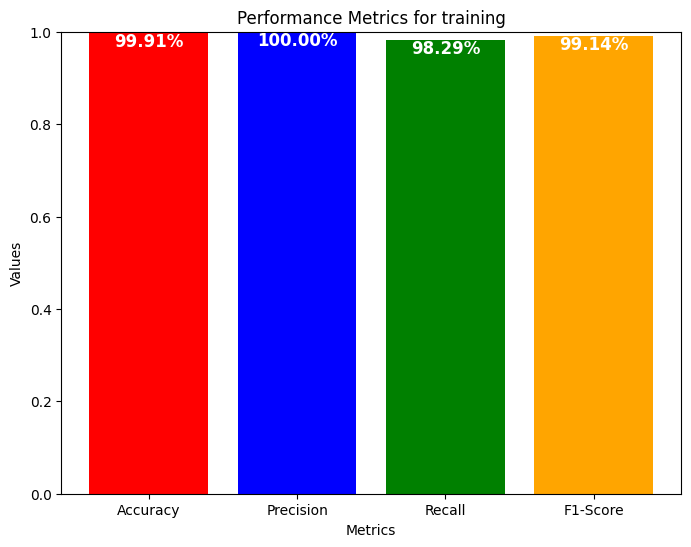

In [251]:
cnn_values = [cnn_train_accuracy, cnn_train_precision,
              cnn_train_recall, train_f1_score_value_cnn]

plt.figure(figsize=(8, 6))
cnn_matrix_bars = plt.bar(metrics, cnn_values, color=['red',
                          'blue', 'green', 'orange'])
for bar in cnn_matrix_bars:
    y_val = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, y_val,
             f'{y_val*100:.2f}%', ha='center', va='top', color='white', fontsize=12, fontweight='bold')

plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Performance Metrics for training')
plt.ylim(0, 1)
plt.show()


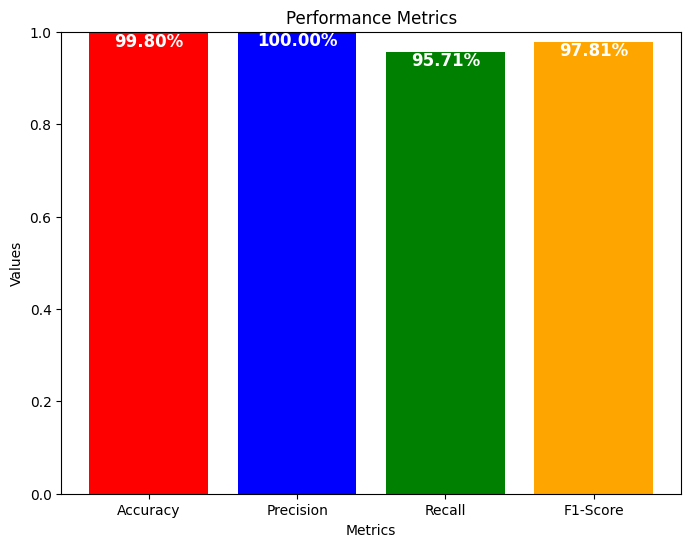

In [252]:
cnn_values = [cnn_accuracy, cnn_precision, cnn_recall, f1_score_value_cnn]

plt.figure(figsize=(8, 6))
cnn_matrix_bars = plt.bar(metrics, cnn_values, color=['red',
                          'blue', 'green', 'orange'])
for bar in cnn_matrix_bars:
    y_val = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, y_val,
             f'{y_val*100:.2f}%', ha='center', va='top', color='white', fontsize=12, fontweight='bold')

plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Performance Metrics')
plt.ylim(0, 1)
plt.show()


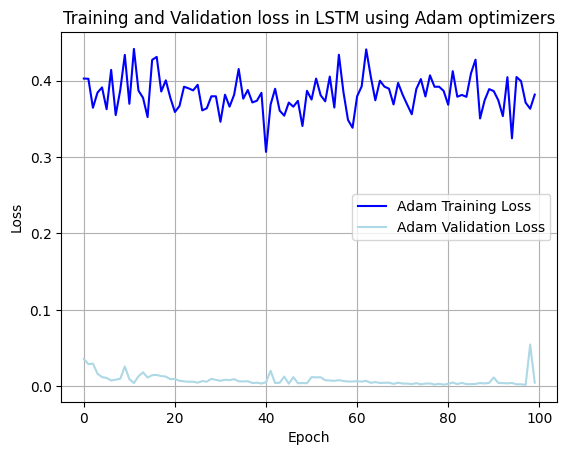

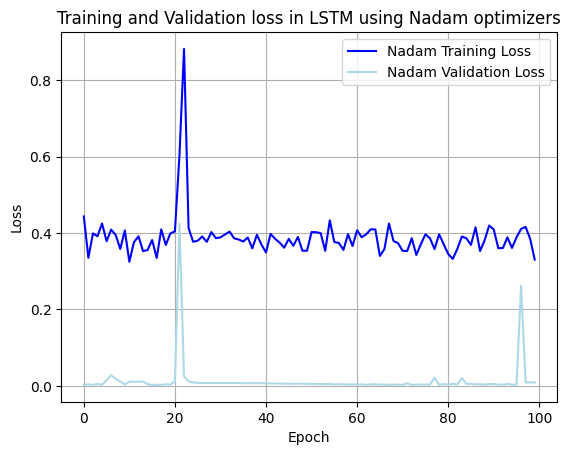

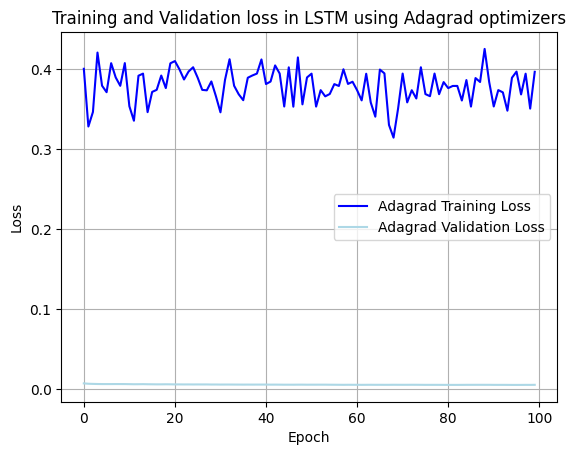

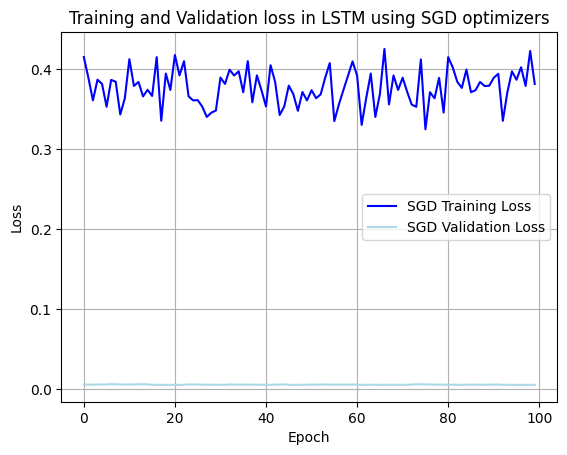

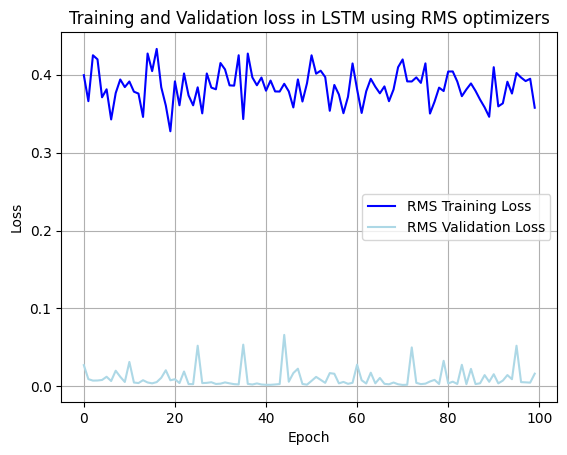

In [253]:
# ----- LSTM Adam Loss -----
plt.plot(lstm_adam_history.history['loss'],
         label="Adam Training Loss", color='blue')
plt.plot(lstm_adam_history.history['val_loss'],
         label="Adam Validation Loss", color='lightblue')

plt.title("Training and Validation loss in LSTM using Adam optimizers")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

# ----- LSTM Nadam Loss -----
plt.plot(lstm_nadam_history.history['loss'],
         label="Nadam Training Loss", color='blue')
plt.plot(lstm_nadam_history.history['val_loss'],
         label="Nadam Validation Loss", color='lightblue')

plt.title("Training and Validation loss in LSTM using Nadam optimizers")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

# ----- LSTM Adgrad Loss -----
plt.plot(lstm_adagrad_history.history['loss'],
         label="Adagrad Training Loss", color='blue')
plt.plot(lstm_adagrad_history.history['val_loss'],
         label="Adagrad Validation Loss", color='lightblue')

plt.title("Training and Validation loss in LSTM using Adagrad optimizers")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

# ----- LSTM SGD Loss -----
plt.plot(lstm_sgd_history.history['loss'],
         label="SGD Training Loss", color='blue')
plt.plot(lstm_sgd_history.history['val_loss'],
         label="SGD Validation Loss", color='lightblue')

plt.title("Training and Validation loss in LSTM using SGD optimizers")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

# ----- LSTM RMSProp Loss -----
plt.plot(lstm_rms_history.history['loss'],
         label="RMS Training Loss", color='blue')
plt.plot(lstm_rms_history.history['val_loss'],
         label="RMS Validation Loss", color='lightblue')

plt.title("Training and Validation loss in LSTM using RMS optimizers")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()


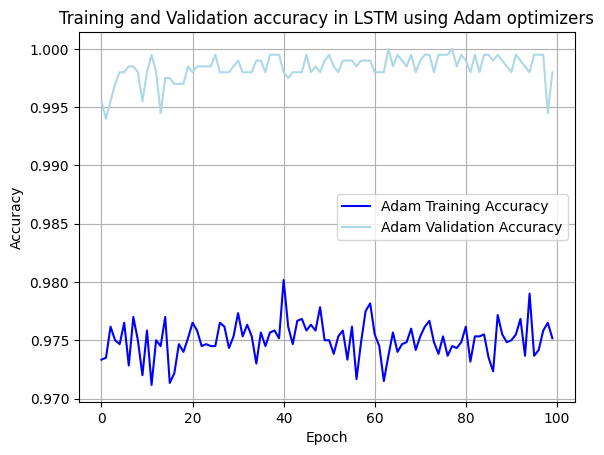

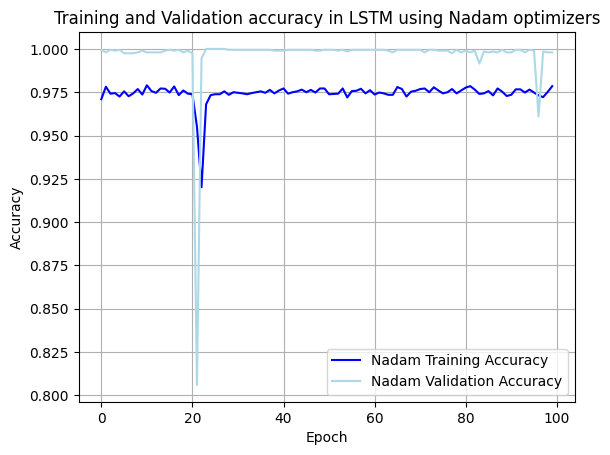

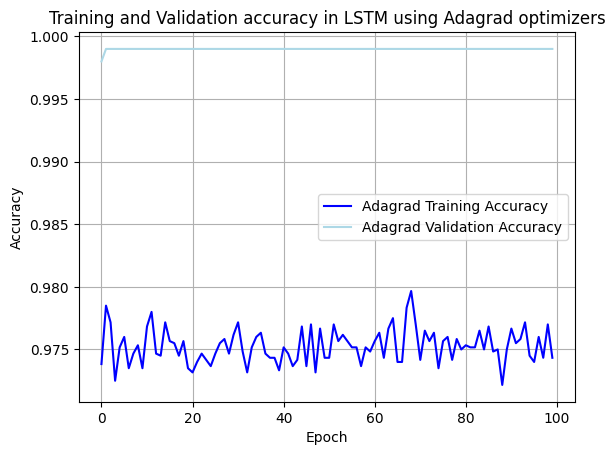

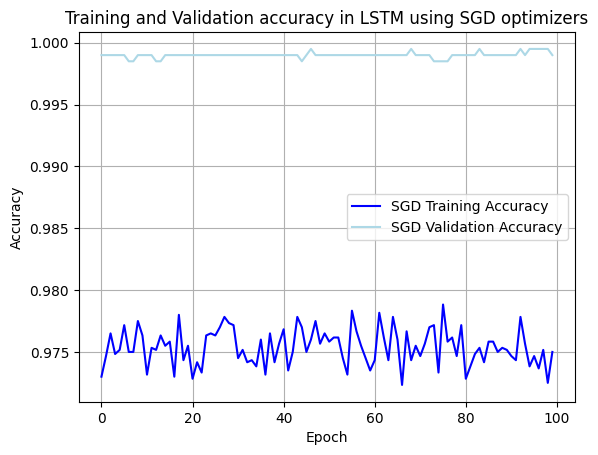

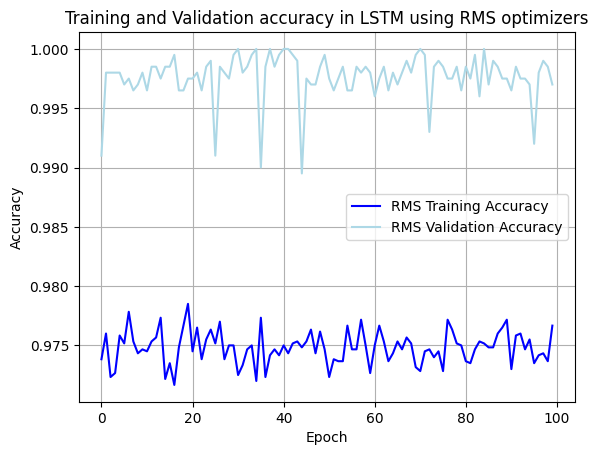

In [254]:
# ----- LSTM Adam Accuracy -----
plt.plot(lstm_adam_history.history['accuracy'],
         label="Adam Training Accuracy", color='blue')
plt.plot(lstm_adam_history.history['val_accuracy'],
         label="Adam Validation Accuracy", color='lightblue')

plt.title("Training and Validation accuracy in LSTM using Adam optimizers")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# ----- LSTM Nadam Accuracy -----
plt.plot(lstm_nadam_history.history['accuracy'],
         label="Nadam Training Accuracy", color='blue')
plt.plot(lstm_nadam_history.history['val_accuracy'],
         label="Nadam Validation Accuracy", color='lightblue')

plt.title("Training and Validation accuracy in LSTM using Nadam optimizers")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# ----- LSTM Adgrad Accuracy -----
plt.plot(lstm_adagrad_history.history['accuracy'],
         label="Adagrad Training Accuracy", color='blue')
plt.plot(lstm_adagrad_history.history['val_accuracy'],
         label="Adagrad Validation Accuracy", color='lightblue')

plt.title("Training and Validation accuracy in LSTM using Adagrad optimizers")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# ----- LSTM SGD Accuracy -----
plt.plot(lstm_sgd_history.history['accuracy'],
         label="SGD Training Accuracy", color='blue')
plt.plot(lstm_sgd_history.history['val_accuracy'],
         label="SGD Validation Accuracy", color='lightblue')

plt.title("Training and Validation accuracy in LSTM using SGD optimizers")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# ----- LSTM RMSProp Accuracy -----
plt.plot(lstm_rms_history.history['accuracy'],
         label="RMS Training Accuracy", color='blue')
plt.plot(lstm_rms_history.history['val_accuracy'],
         label="RMS Validation Accuracy", color='lightblue')

plt.title("Training and Validation accuracy in LSTM using RMS optimizers")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()


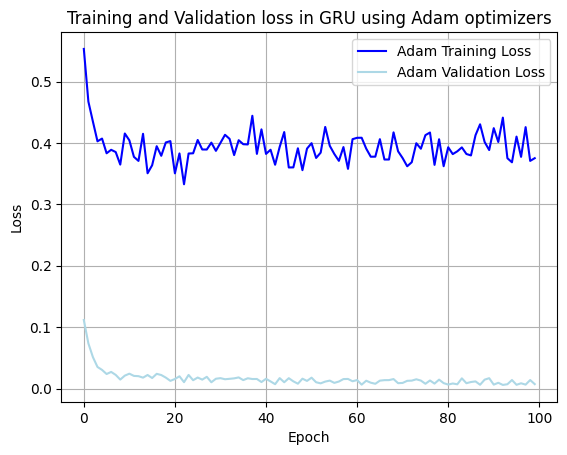

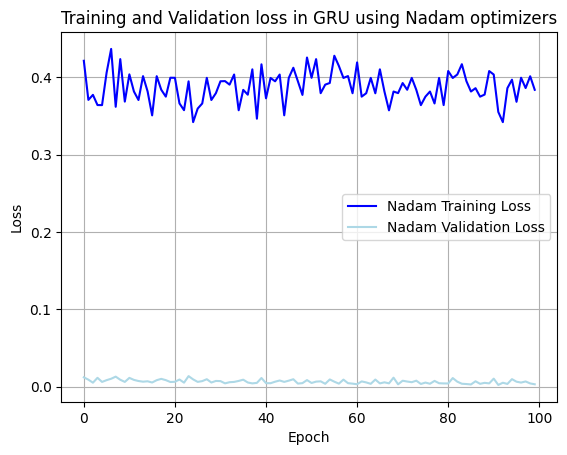

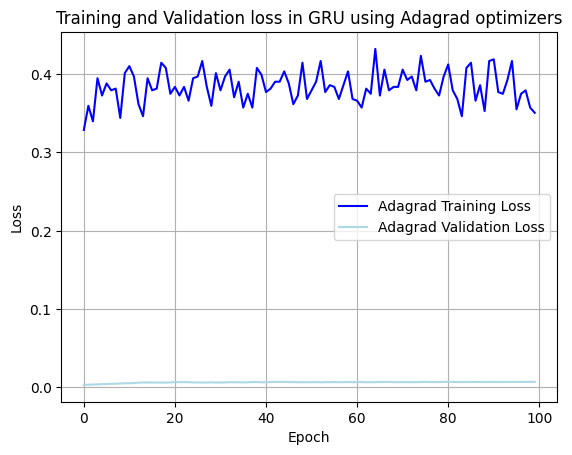

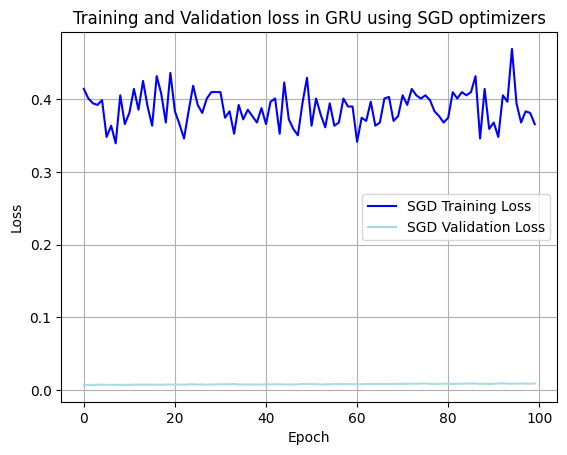

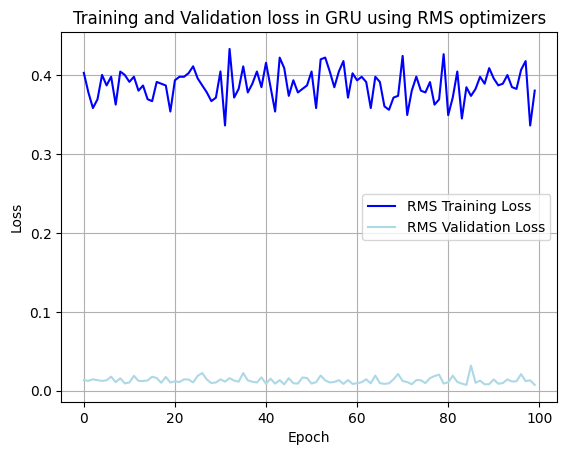

In [255]:
# ----- GRU Adam Loss -----
plt.plot(gru_adam_history.history['loss'],
         label="Adam Training Loss", color='blue')
plt.plot(gru_adam_history.history['val_loss'],
         label="Adam Validation Loss", color='lightblue')

plt.title("Training and Validation loss in GRU using Adam optimizers")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

# ----- GRU Nadam Loss -----
plt.plot(gru_nadam_history.history['loss'],
         label="Nadam Training Loss", color='blue')
plt.plot(gru_nadam_history.history['val_loss'],
         label="Nadam Validation Loss", color='lightblue')

plt.title("Training and Validation loss in GRU using Nadam optimizers")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

# ----- GRU Adgrad Loss -----
plt.plot(gru_adagrad_history.history['loss'],
         label="Adagrad Training Loss", color='blue')
plt.plot(gru_adagrad_history.history['val_loss'],
         label="Adagrad Validation Loss", color='lightblue')

plt.title("Training and Validation loss in GRU using Adagrad optimizers")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

# ----- GRU SGD Loss -----
plt.plot(gru_sgd_history.history['loss'],
         label="SGD Training Loss", color='blue')
plt.plot(gru_sgd_history.history['val_loss'],
         label="SGD Validation Loss", color='lightblue')

plt.title("Training and Validation loss in GRU using SGD optimizers")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

# ----- GRU RMSProp Loss -----
plt.plot(gru_rms_history.history['loss'],
         label="RMS Training Loss", color='blue')
plt.plot(gru_rms_history.history['val_loss'],
         label="RMS Validation Loss", color='lightblue')

plt.title("Training and Validation loss in GRU using RMS optimizers")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()


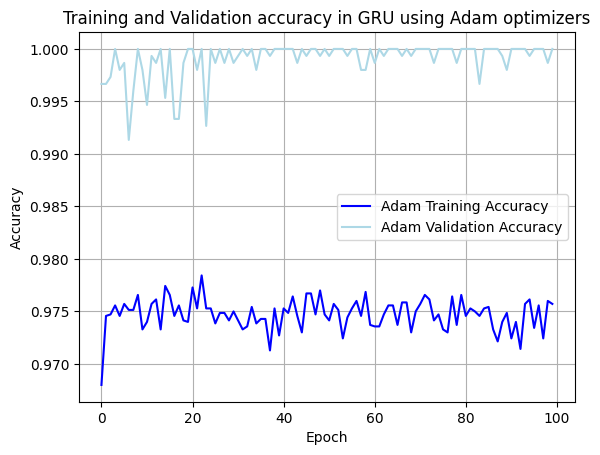

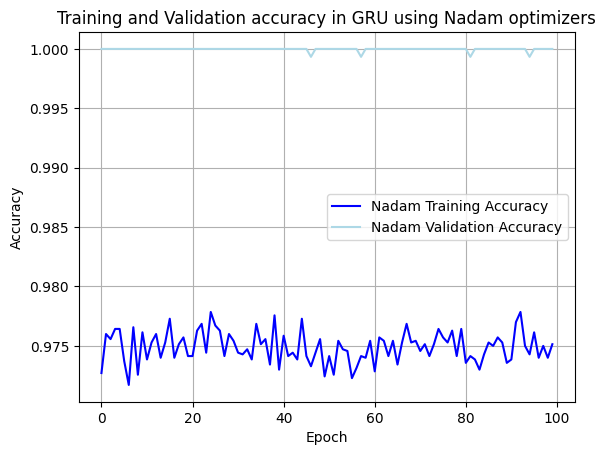

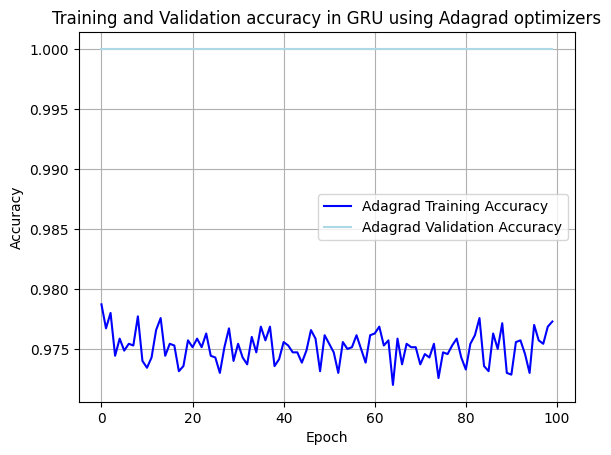

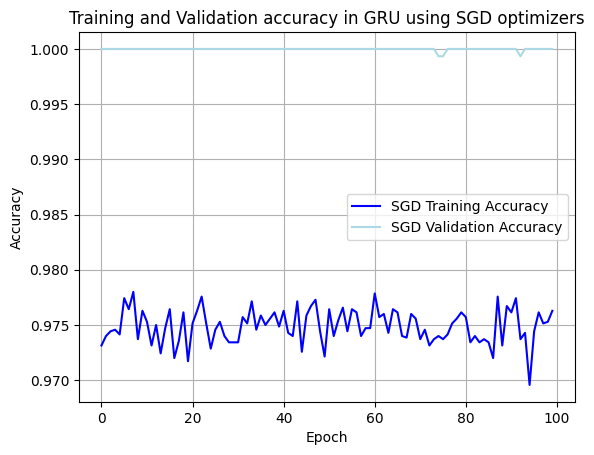

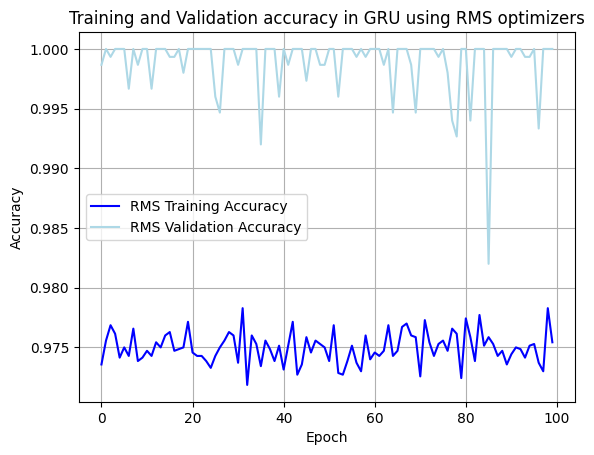

In [256]:
# ----- GRU Adam Accuracy -----
plt.plot(gru_adam_history.history['accuracy'],
         label="Adam Training Accuracy", color='blue')
plt.plot(gru_adam_history.history['val_accuracy'],
         label="Adam Validation Accuracy", color='lightblue')

plt.title("Training and Validation accuracy in GRU using Adam optimizers")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# ----- GRU Nadam Accuracy -----
plt.plot(gru_nadam_history.history['accuracy'],
         label="Nadam Training Accuracy", color='blue')
plt.plot(gru_nadam_history.history['val_accuracy'],
         label="Nadam Validation Accuracy", color='lightblue')

plt.title("Training and Validation accuracy in GRU using Nadam optimizers")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# ----- GRU Adgrad Accuracy -----
plt.plot(gru_adagrad_history.history['accuracy'],
         label="Adagrad Training Accuracy", color='blue')
plt.plot(gru_adagrad_history.history['val_accuracy'],
         label="Adagrad Validation Accuracy", color='lightblue')

plt.title("Training and Validation accuracy in GRU using Adagrad optimizers")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# ----- GRU SGD Accuracy -----
plt.plot(gru_sgd_history.history['accuracy'],
         label="SGD Training Accuracy", color='blue')
plt.plot(gru_sgd_history.history['val_accuracy'],
         label="SGD Validation Accuracy", color='lightblue')

plt.title("Training and Validation accuracy in GRU using SGD optimizers")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# ----- GRU RMSProp Accuracy -----
plt.plot(gru_rms_history.history['accuracy'],
         label="RMS Training Accuracy", color='blue')
plt.plot(gru_rms_history.history['val_accuracy'],
         label="RMS Validation Accuracy", color='lightblue')

plt.title("Training and Validation accuracy in GRU using RMS optimizers")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()


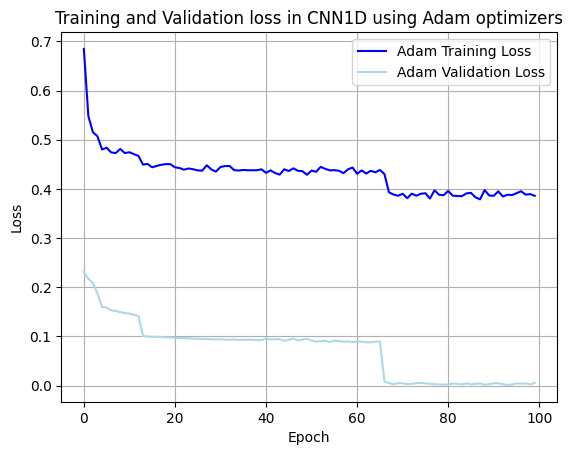

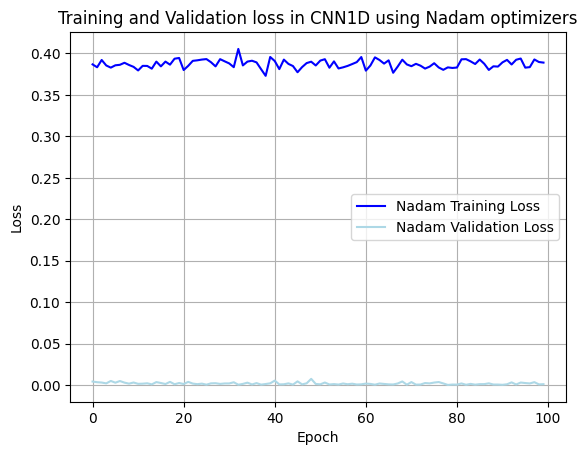

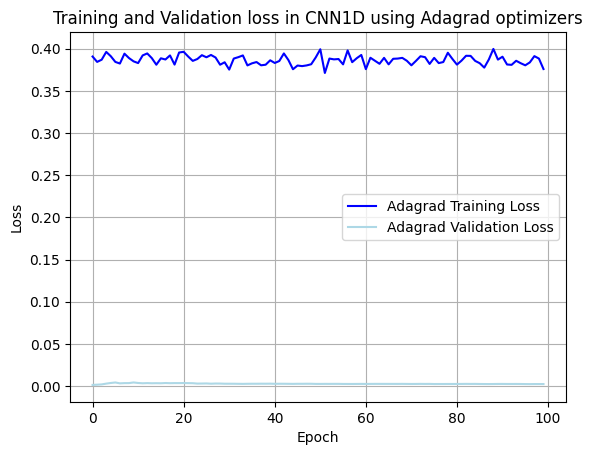

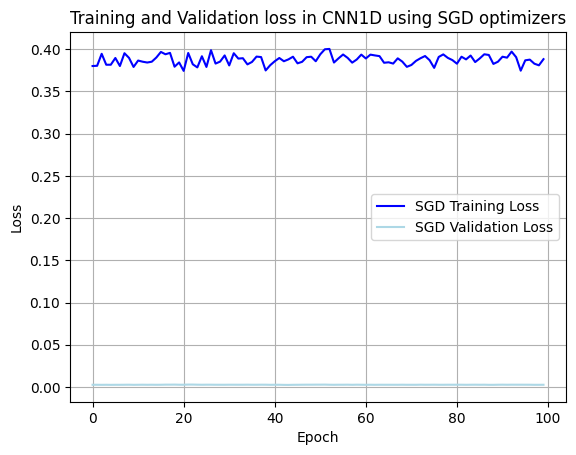

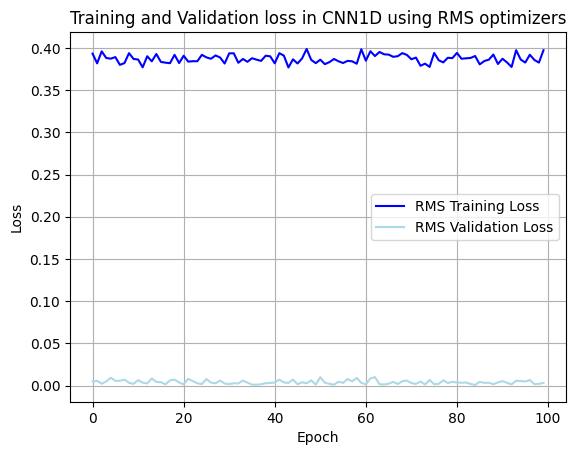

In [257]:
# ----- CNN1D Adam Loss -----
plt.plot(cnn_adam_history.history['loss'],
         label="Adam Training Loss", color='blue')
plt.plot(cnn_adam_history.history['val_loss'],
         label="Adam Validation Loss", color='lightblue')

plt.title("Training and Validation loss in CNN1D using Adam optimizers")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

# ----- CNN1D Nadam Loss -----
plt.plot(cnn_nadam_history.history['loss'],
         label="Nadam Training Loss", color='blue')
plt.plot(cnn_nadam_history.history['val_loss'],
         label="Nadam Validation Loss", color='lightblue')

plt.title("Training and Validation loss in CNN1D using Nadam optimizers")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

# ----- CNN1D Adgrad Loss -----
plt.plot(cnn_adagrad_history.history['loss'],
         label="Adagrad Training Loss", color='blue')
plt.plot(cnn_adagrad_history.history['val_loss'],
         label="Adagrad Validation Loss", color='lightblue')

plt.title("Training and Validation loss in CNN1D using Adagrad optimizers")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

# ----- CNN1D SGD Loss -----
plt.plot(cnn_sgd_history.history['loss'],
         label="SGD Training Loss", color='blue')
plt.plot(cnn_sgd_history.history['val_loss'],
         label="SGD Validation Loss", color='lightblue')

plt.title("Training and Validation loss in CNN1D using SGD optimizers")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

# ----- CNN1D RMSProp Loss -----
plt.plot(cnn_rms_history.history['loss'],
         label="RMS Training Loss", color='blue')
plt.plot(cnn_rms_history.history['val_loss'],
         label="RMS Validation Loss", color='lightblue')

plt.title("Training and Validation loss in CNN1D using RMS optimizers")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()


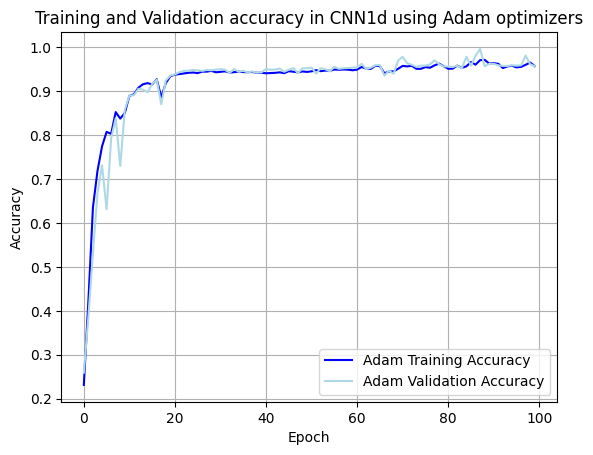

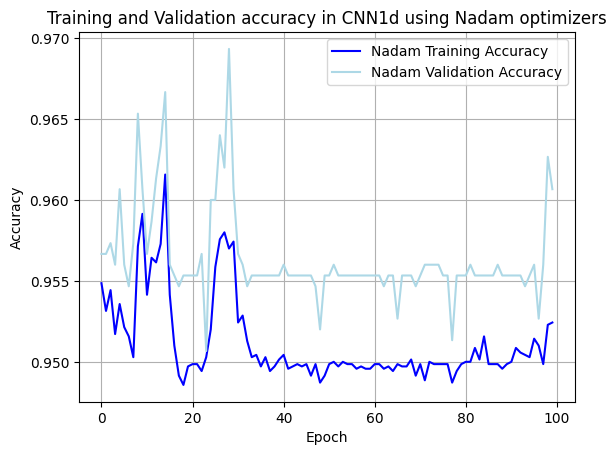

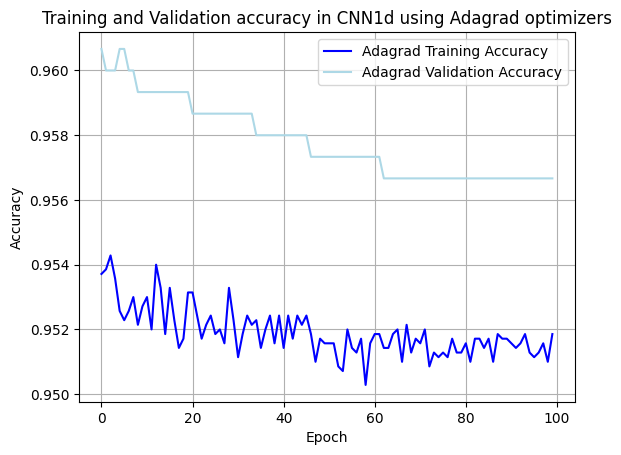

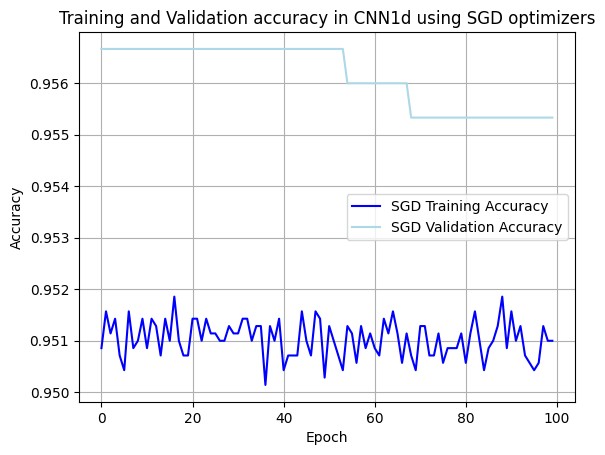

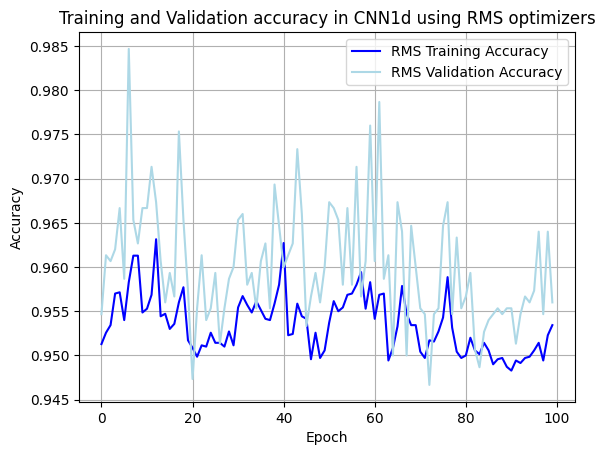

In [258]:
# ----- CNN1d Adam Accuracy -----
plt.plot(cnn_adam_history.history['accuracy'],
         label="Adam Training Accuracy", color='blue')
plt.plot(cnn_adam_history.history['val_accuracy'],
         label="Adam Validation Accuracy", color='lightblue')

plt.title("Training and Validation accuracy in CNN1d using Adam optimizers")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# ----- CNN1d Nadam Accuracy -----
plt.plot(cnn_nadam_history.history['accuracy'],
         label="Nadam Training Accuracy", color='blue')
plt.plot(cnn_nadam_history.history['val_accuracy'],
         label="Nadam Validation Accuracy", color='lightblue')

plt.title("Training and Validation accuracy in CNN1d using Nadam optimizers")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# ----- CNN1d Adgrad Accuracy -----
plt.plot(cnn_adagrad_history.history['accuracy'],
         label="Adagrad Training Accuracy", color='blue')
plt.plot(cnn_adagrad_history.history['val_accuracy'],
         label="Adagrad Validation Accuracy", color='lightblue')

plt.title("Training and Validation accuracy in CNN1d using Adagrad optimizers")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# ----- CNN1d SGD Accuracy -----
plt.plot(cnn_sgd_history.history['accuracy'],
         label="SGD Training Accuracy", color='blue')
plt.plot(cnn_sgd_history.history['val_accuracy'],
         label="SGD Validation Accuracy", color='lightblue')

plt.title("Training and Validation accuracy in CNN1d using SGD optimizers")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# ----- CNN1d RMSProp Accuracy -----
plt.plot(cnn_rms_history.history['accuracy'],
         label="RMS Training Accuracy", color='blue')
plt.plot(cnn_rms_history.history['val_accuracy'],
         label="RMS Validation Accuracy", color='lightblue')

plt.title("Training and Validation accuracy in CNN1d using RMS optimizers")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()


In [259]:
# plt.figure(figsize=(12, 6))

# cnn_adam_h = np.mean(cnn_adam_history.history['loss'])
# cnn_nadam_h = np.mean(cnn_nadam_history.history['loss'])
# cnn_adagrad_h = np.mean(cnn_adagrad_history.history['loss'])
# cnn_sgd_h = np.mean(cnn_sgd_history.history['loss'])
# cnn_rms_h = np.mean(cnn_rms_history.history['loss'])

# cnn_adam_h_v = np.mean(cnn_adam_history.history['val_loss'])
# cnn_nadam_h_v = np.mean(cnn_nadam_history.history['val_loss'])
# cnn_adagrad_h_v = np.mean(cnn_adagrad_history.history['val_loss'])
# cnn_sgd_h_v = np.mean(cnn_sgd_history.history['val_loss'])
# cnn_rms_h_v = np.mean(cnn_rms_history.history['val_loss'])

# cnn_optimizers = [cnn_adam_h, cnn_nadam_h,
#                   cnn_adagrad_h, cnn_sgd_h, cnn_rms_h]
# cnn_optimizers_v = [cnn_adam_h_v, cnn_nadam_h_v,
#                     cnn_adagrad_h_v, cnn_sgd_h_v, cnn_rms_h_v]

# plt.plot(cnn_optimizers, label="Loss", color='blue')
# plt.plot(cnn_optimizers_v, label="Validation Loss", color='lightblue')

# plt.title("Training and Validation loss in CNN1D")
# plt.xlabel("Epoch")
# plt.ylabel("Loss")
# plt.legend()
# plt.grid(True)
# plt.show()


In [260]:
# plt.figure(figsize=(12, 6))

# cnn_adam_acc = np.mean(cnn_adam_history.history['accuracy'])
# cnn_nadam_acc = np.mean(cnn_nadam_history.history['accuracy'])
# cnn_adagrad_acc = np.mean(cnn_adagrad_history.history['accuracy'])
# cnn_sgd_acc = np.mean(cnn_sgd_history.history['accuracy'])
# cnn_rms_acc = np.mean(cnn_rms_history.history['accuracy'])

# cnn_adam_val_acc = np.mean(cnn_adam_history.history['val_accuracy'])
# cnn_nadam_val_acc = np.mean(cnn_nadam_history.history['val_accuracy'])
# cnn_adagrad_val_acc = np.mean(cnn_adagrad_history.history['val_accuracy'])
# cnn_sgd_val_acc = np.mean(cnn_sgd_history.history['val_accuracy'])
# cnn_rms_val_acc = np.mean(cnn_rms_history.history['val_accuracy'])


# cnn_optimizers_acc = [cnn_adam_acc, cnn_nadam_acc,
#                       cnn_adagrad_acc, cnn_sgd_acc, cnn_rms_acc]
# cnn_optimizers_val_acc = [cnn_adam_val_acc, cnn_nadam_val_acc,
#                           cnn_adagrad_val_acc, cnn_sgd_val_acc, cnn_rms_val_acc]

# plt.plot(cnn_optimizers_acc, label="Accuracy", color='blue')
# plt.plot(cnn_optimizers_val_acc, label="Validation Accuracy", color='lightblue')

# plt.title("Training and Validation accuracy in CNN1D")
# plt.xlabel("Epoch")
# plt.ylabel("Accuracy")
# plt.legend()
# plt.grid(True)
# plt.show()


In [261]:
models = ['LSTM', 'GRU', '1D-CNN']


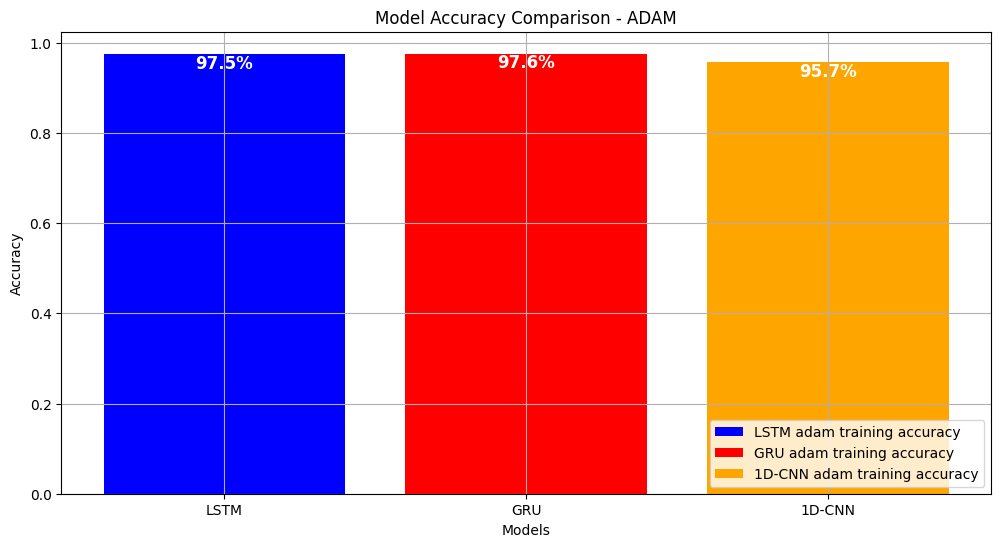

In [262]:
plt.figure(figsize=(12, 6))

# lstm_adam_train_acc = np.mean(lstm_adam_history.history["accuracy"])
# lstm_adam_val_acc = np.mean(lstm_adam_history.history["val_accuracy"])

# gru_adam_train_acc = np.mean(gru_adam_history.history["accuracy"])
# gru_adam_val_acc = np.mean(gru_adam_history.history["val_accuracy"])

# cnn_adam_train_acc = np.mean(cnn_adam_history.history["accuracy"])
# cnn_adam_val_acc = np.mean(cnn_adam_history.history["val_accuracy"])

adam_histories = [lstm_adam_history, gru_adam_history, cnn_adam_history]

# adam_accuracies = [lstm_adam_train_acc, gru_adam_train_acc, cnn_adam_train_acc]

adam_accuracies = [a_history.history['accuracy'][-1]
                   for a_history in adam_histories]

adam_bar = plt.bar(models, adam_accuracies, label=['LSTM adam training accuracy',
                                                   'GRU adam training accuracy', '1D-CNN adam training accuracy'], color=['blue', 'red', 'orange'])

for bar in adam_bar:
    y_val = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, y_val,
             f'{y_val*100:.1f}%', ha='center', va='top', color='white', fontsize=12, fontweight='bold')

plt.title("Model Accuracy Comparison - ADAM")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


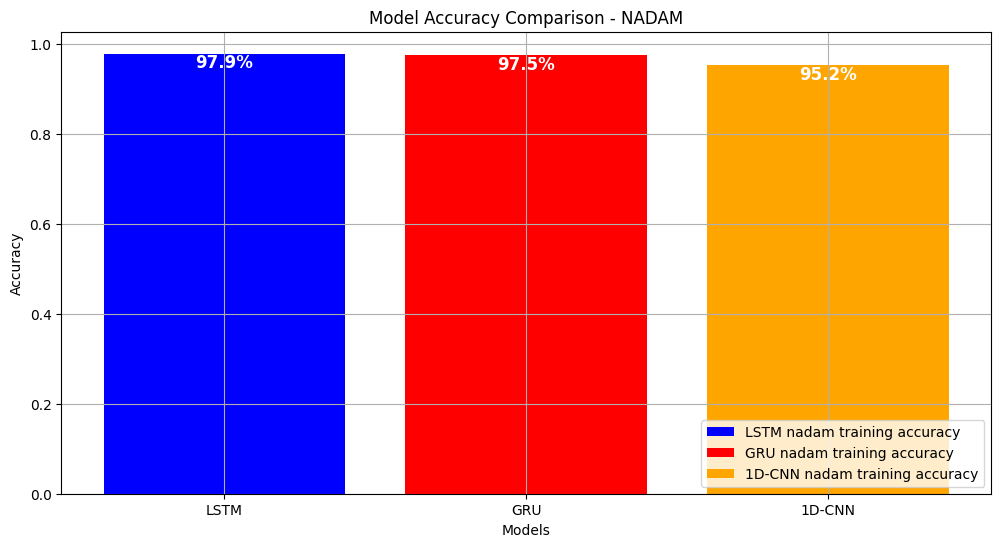

In [263]:
plt.figure(figsize=(12, 6))

# lstm_nadam_train_acc = np.mean(lstm_nadam_history.history["accuracy"])
# lstm_nadam_val_acc = lstm_nadam_history.history["val_accuracy"]

# gru_nadam_train_acc = np.mean(gru_nadam_history.history["accuracy"])
# gru_nadam_val_acc = gru_nadam_history.history["val_accuracy"]

# cnn_nadam_train_acc = np.mean(cnn_nadam_history.history["accuracy"])
# cnn_nadam_val_acc = cnn_nadam_history.history["val_accuracy"]

# nadam_accuracies = [lstm_nadam_train_acc,
#                     gru_nadam_train_acc, cnn_nadam_train_acc]

nadam_histories = [lstm_nadam_history, gru_nadam_history, cnn_nadam_history]

nadam_accuracies = [n_history.history['accuracy'][-1]
                    for n_history in nadam_histories]

nadam_bar = plt.bar(models, nadam_accuracies, label=['LSTM nadam training accuracy',
                                                     'GRU nadam training accuracy', '1D-CNN nadam training accuracy'], color=['blue', 'red', 'orange'])

for bar in nadam_bar:
    y_val = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, y_val,
             f'{y_val*100:.1f}%', ha='center', va='top', color='white', fontsize=12, fontweight='bold')

plt.title('Model Accuracy Comparison - NADAM')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


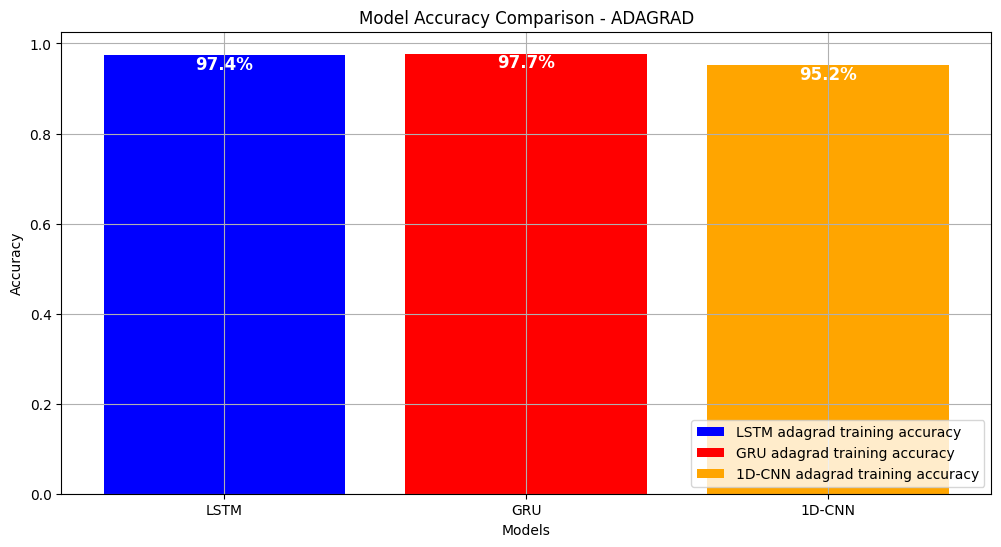

In [264]:
plt.figure(figsize=(12, 6))

# lstm_adagrad_train_acc = np.mean(lstm_adagrad_history.history['accuracy'])
# lstm_adagrad_val_acc = lstm_adagrad_history.history['val_accuracy']

# gru_adagrad_train_acc = np.mean(gru_adagrad_history.history['accuracy'])
# gru_adagrad_val_acc = gru_adagrad_history.history['val_accuracy']

# cnn_adagrad_train_acc = np.mean(cnn_adagrad_history.history['accuracy'])
# cnn_adagrad_val_acc = cnn_adagrad_history.history['val_accuracy']

# adagrad_accuracies = [lstm_adagrad_train_acc,
#                       gru_adagrad_train_acc, cnn_adagrad_train_acc]

adagrad_histories = [lstm_adagrad_history,
                     gru_adagrad_history, cnn_adagrad_history]

adagrad_accuracies = [ad_history.history['accuracy'][-1]
                      for ad_history in adagrad_histories]

adagrad_bar = plt.bar(models, adagrad_accuracies,  label=['LSTM adagrad training accuracy',
                                                          'GRU adagrad training accuracy', '1D-CNN adagrad training accuracy'], color=['blue', 'red',  'orange'])

for bar in adagrad_bar:
    y_val = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, y_val,
             f'{y_val*100:.1f}%', ha='center', va='top', color='white', fontsize=12, fontweight='bold')

plt.title('Model Accuracy Comparison - ADAGRAD')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


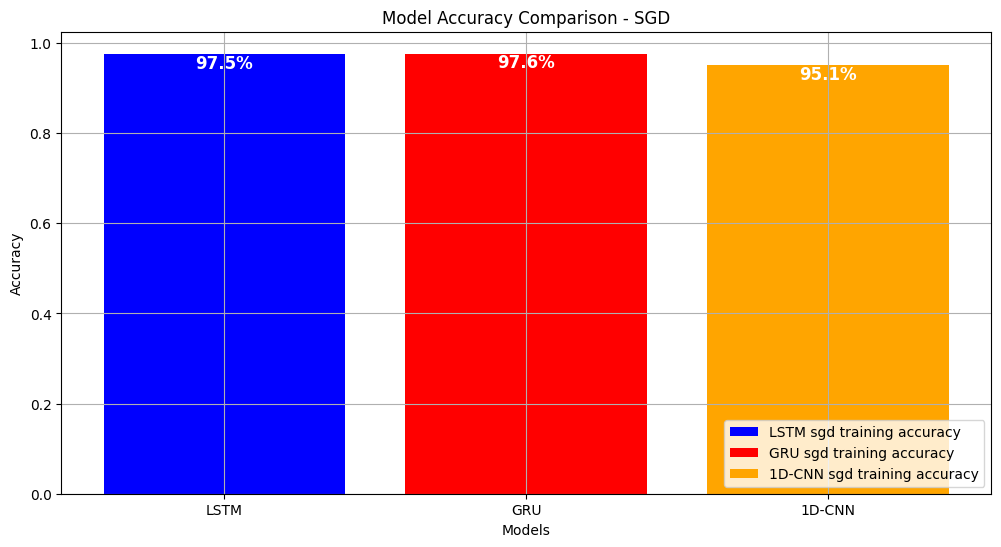

In [265]:
plt.figure(figsize=(12, 6))

# lstm_sgd_train_acc = np.mean(lstm_sgd_history.history['accuracy'])

# gru_sgd_train_acc = np.mean(gru_sgd_history.history['accuracy'])

# cnn_sgd_train_acc = np.mean(cnn_sgd_history.history['accuracy'])

# sgd_accuracies = [lstm_sgd_train_acc,
#                   gru_sgd_train_acc, cnn_sgd_train_acc]

sgd_histories = [lstm_sgd_history, gru_sgd_history, cnn_sgd_history]

sgd_accuracies = [sgd_history.history['accuracy'][-1]
                  for sgd_history in sgd_histories]

sgd_bar = plt.bar(models, sgd_accuracies,  label=['LSTM sgd training accuracy',
                                                  'GRU sgd training accuracy', '1D-CNN sgd training accuracy'], color=['blue', 'red',  'orange'])

for bar in sgd_bar:
    y_val = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, y_val,
             f'{y_val*100:.1f}%', ha='center', va='top', color='white', fontsize=12, fontweight='bold')

plt.title('Model Accuracy Comparison - SGD')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


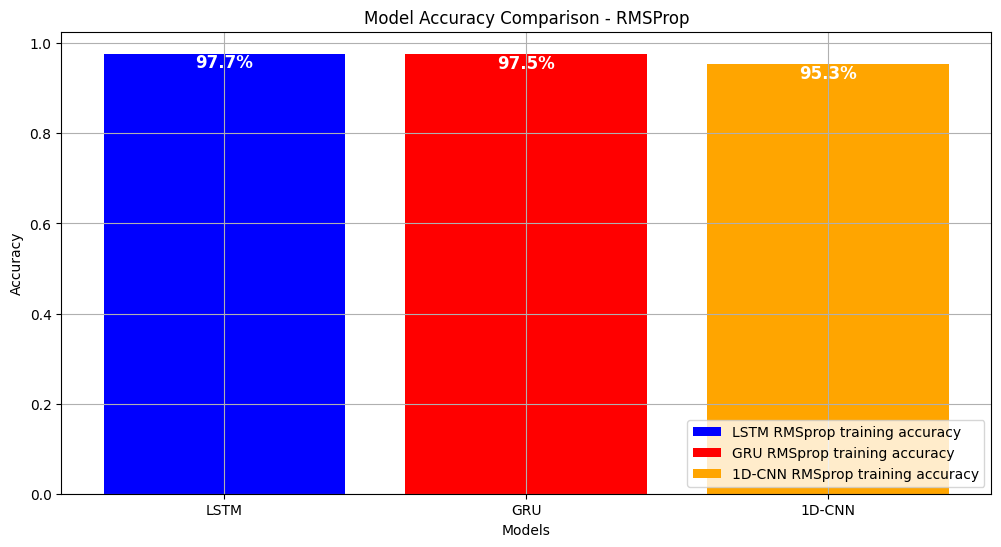

In [266]:
plt.figure(figsize=(12, 6))

# lstm_rms_train_acc = np.mean(lstm_rms_history.history['accuracy'])
# gru_rms_train_acc = np.mean(gru_rms_history.history['accuracy'])
# cnn_rms_train_acc = np.mean(cnn_rms_history.history['accuracy'])

# rms_accuracies = [lstm_rms_train_acc, gru_rms_train_acc, cnn_rms_train_acc]

rms_histories = [lstm_rms_history, gru_rms_history, cnn_rms_history]

rms_accuracies = [rms_history.history['accuracy'][-1]
                  for rms_history in rms_histories]

rms_bar = plt.bar(models, rms_accuracies, label=['LSTM RMSprop training accuracy',
                                                 'GRU RMSprop training accuracy', '1D-CNN RMSprop training accuracy'], color=['blue', 'red',  'orange'])

for bar in rms_bar:
    y_val = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, y_val,
             f'{y_val*100:.1f}%', ha='center', va='top', color='white', fontsize=12, fontweight='bold')

plt.title('Model Accuracy Comparison - RMSProp')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


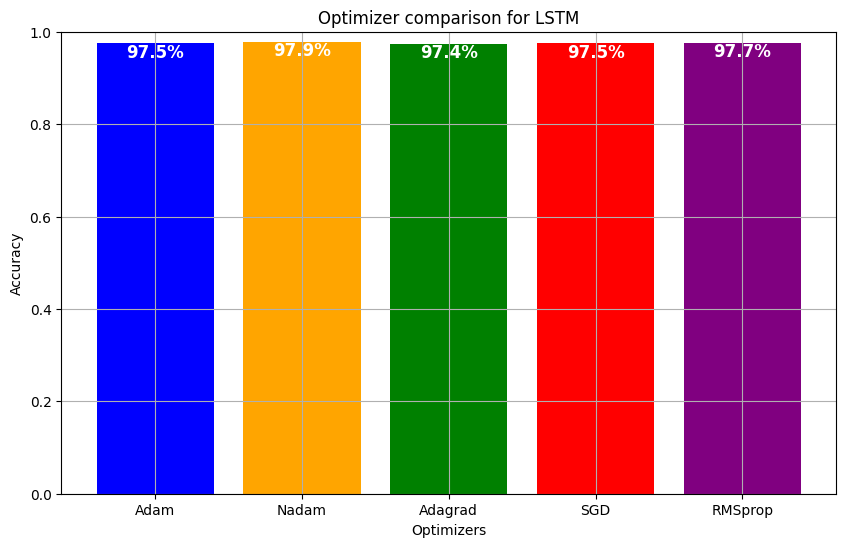

In [267]:
optimizers = ['Adam', 'Nadam', 'Adagrad', 'SGD', 'RMSprop']
lstm_histories = [lstm_adam_history, lstm_nadam_history,
                  lstm_adagrad_history, lstm_sgd_history, lstm_rms_history]

plt.figure(figsize=(10, 6))

lstm_accuracies = [history.history['accuracy'][-1]
                   for history in lstm_histories]

lstm_bars = plt.bar(optimizers, lstm_accuracies, color=[
    'blue', 'orange', 'green', 'red', 'purple'])
plt.title("Optimizer comparison for LSTM")
plt.xlabel('Optimizers')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.grid(True)

for bar in lstm_bars:
    y_val = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, y_val,
             f'{y_val*100:.1f}%', ha='center', va='top', color='white', fontsize=12, fontweight='bold')

plt.show()


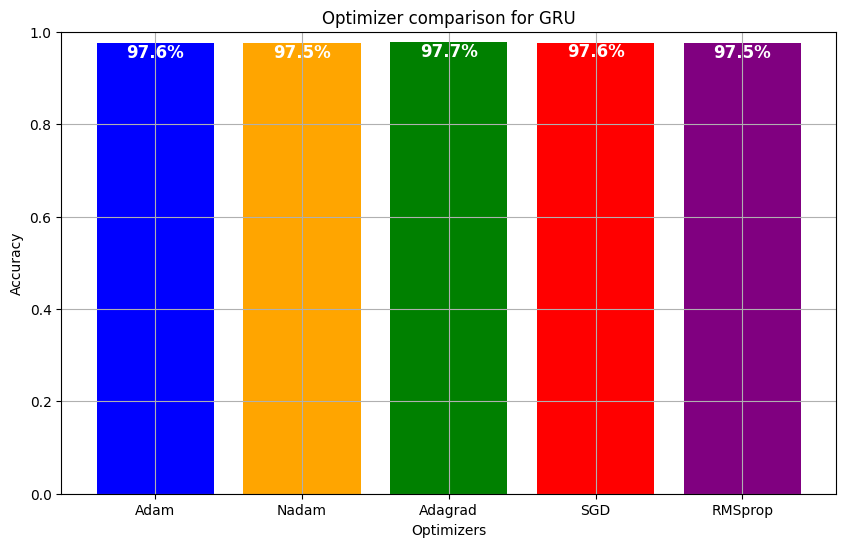

In [268]:
optimizers = ['Adam', 'Nadam', 'Adagrad', 'SGD', 'RMSprop']
gru_histories = [gru_adam_history, gru_nadam_history,
                 gru_adagrad_history, gru_sgd_history, gru_rms_history]

plt.figure(figsize=(10, 6))

gru_accuracies = [history.history['accuracy'][-1] for history in gru_histories]

gru_bars = plt.bar(optimizers, gru_accuracies, color=[
    'blue', 'orange', 'green', 'red', 'purple'])
plt.title("Optimizer comparison for GRU")
plt.xlabel('Optimizers')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.grid(True)

for bar in gru_bars:
    y_val = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, y_val,
             f'{y_val*100:.1f}%', ha='center', va='top', color='white', fontsize=12, fontweight='bold')

plt.show()


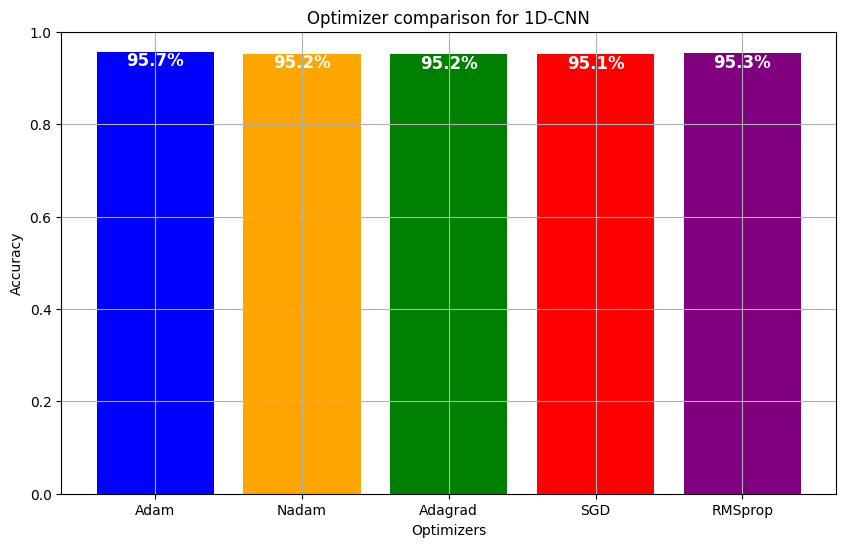

In [269]:
optimizers = ['Adam', 'Nadam', 'Adagrad', 'SGD', 'RMSprop']
cnn_histories = [cnn_adam_history, cnn_nadam_history,
                 cnn_adagrad_history, cnn_sgd_history, cnn_rms_history]

plt.figure(figsize=(10, 6))

cnn_accuracies = [history.history['accuracy'][-1] for history in cnn_histories]

cnn_bars = plt.bar(optimizers, cnn_accuracies, color=[
    'blue', 'orange', 'green', 'red', 'purple'])
plt.title("Optimizer comparison for 1D-CNN")
plt.xlabel('Optimizers')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.grid(True)

for bar in cnn_bars:
    y_val = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, y_val,
             f'{y_val*100:.1f}%', ha='center', va='top', color='white', fontsize=12, fontweight='bold')

plt.show()
